In [120]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [168]:
df=pd.read_excel("E:/DS Course/compactiv.xlsx")
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [238]:
df_copy=df.copy()
df_copy.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [240]:
df.shape

(8192, 22)

In [241]:
df.duplicated().sum()

0

In [242]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [8]:
np.round(df.describe(include='all').T,2)

count unique            top  freq            mean            std  \
lread     8192.0    NaN            NaN   NaN       19.559692      53.353799   
lwrite    8192.0    NaN            NaN   NaN       13.106201      29.891726   
scall     8192.0    NaN            NaN   NaN     2306.318237    1633.617322   
sread     8192.0    NaN            NaN   NaN       210.47998     198.980146   
swrite    8192.0    NaN            NaN   NaN      150.058228      160.47898   
fork      8192.0    NaN            NaN   NaN        1.884554       2.479493   
exec      8192.0    NaN            NaN   NaN        2.791998       5.212456   
rchar     8088.0    NaN            NaN   NaN   197385.728363  239837.493526   
wchar     8177.0    NaN            NaN   NaN    95902.992785  140841.707911   
pgout     8192.0    NaN            NaN   NaN        2.285317       5.307038   
ppgout    8192.0    NaN            NaN   NaN        5.977229       15.21459   
pgfree    8192.0    NaN            NaN   NaN       11.919712       32.36352   
pgscan    8192.0    NaN            NaN   NaN       21.526849       71.14134   
atch      8192.0    NaN            NaN   NaN        1.127505       5.708347   
pgin      8192.0    NaN            NaN   NaN         8.27796      13.874978   
ppgin     8192.0    NaN            NaN   NaN       12.388586      22.281318   
pflt      8192.0    NaN            NaN   NaN      109.793799     114.419221   
vflt      8192.0    NaN            NaN   NaN      185.315796     191.000603   
runqsz      8192      2  Not_CPU_Bound  4331             NaN            NaN   
freemem   8192.0    NaN            NaN   NaN     1763.456299    2482.104511   
freeswap  8192.0    NaN            NaN   NaN  1328125.959839  422019.426957   
usr       8192.0    NaN            NaN   NaN       83.968872      18.401905   

             min        25%        50%        75%        max  
lread        0.0        2.0        7.0       20.0     1845.0  
lwrite       0.0        0.0        1.0       10.0      575.0  
scall      109.0     1012.0     2051.5    3317.25    12493.0  
sread        6.0       86.0      166.0      279.0     5318.0  
swrite       7.0       63.0      117.0      185.0     5456.0  
fork         0.0        0.4        0.8        2.2      20.12  
exec         0.0        0.2        1.2        2.8      59.56  
rchar      278.0    34091.5   125473.5  267828.75  2526649.0  
wchar     1498.0    22916.0    46619.0   106101.0  1801623.0  
pgout        0.0        0.0        0.0        2.4      81.44  
ppgout       0.0        0.0        0.0        4.2      184.2  
pgfree       0.0        0.0        0.0        5.0      523.0  
pgscan       0.0        0.0        0.0        0.0     1237.0  
atch         0.0        0.0        0.0        0.6     211.58  
pgin         0.0        0.6        2.8      9.765      141.2  
ppgin        0.0        0.6        3.8       13.8     292.61  
pflt         0.0       25.0       63.8      159.6      899.8  
vflt         0.2       45.4      120.4      251.8     1365.0  
runqsz       NaN        NaN        NaN        NaN        NaN  
freemem     55.0      231.0      579.0    2002.25    12027.0  
freeswap     2.0  1042623.5  1289289.5  1730379.5  2243187.0  
usr          0.0       81.0       89.0       94.0       99.0

In [169]:
num = list(df.dtypes[df.dtypes != 'object'].index)
cat = list(df.dtypes[df.dtypes == "object"].index)


Univariate Analysis

In [244]:
df.runqsz.value_counts()

runqsz
Not_CPU_Bound    4331
CPU_Bound        3861
Name: count, dtype: int64

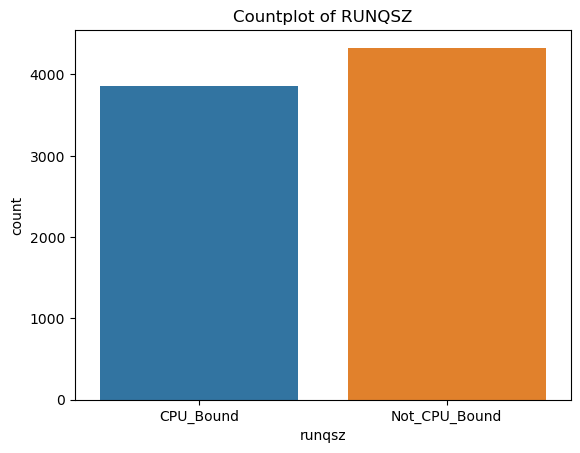

In [11]:
sns.countplot(data=df,x="runqsz")
plt.title("Countplot of RUNQSZ")
plt.xlabel("runqsz")
plt.show()

C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

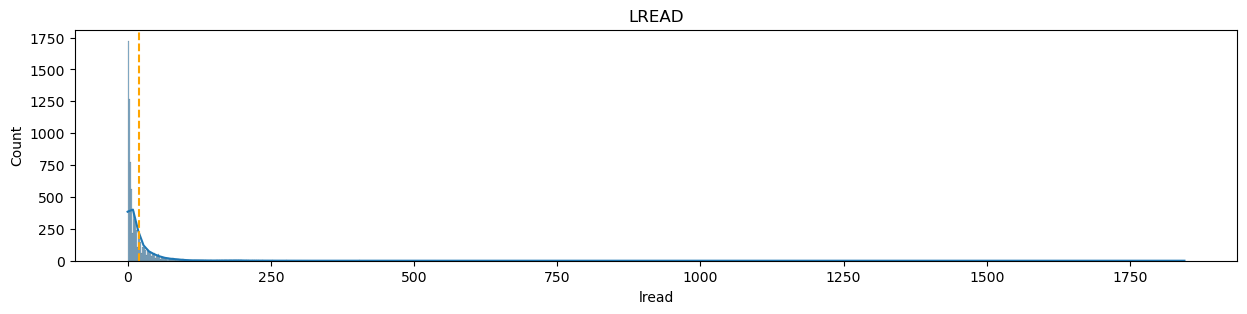

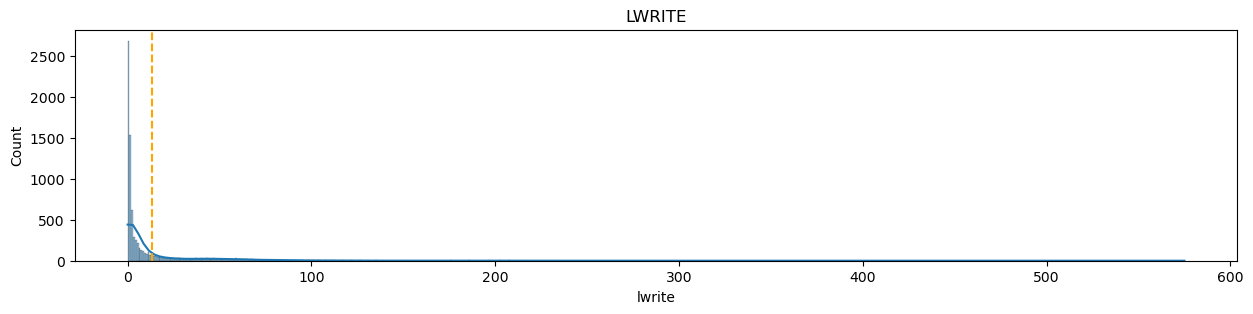

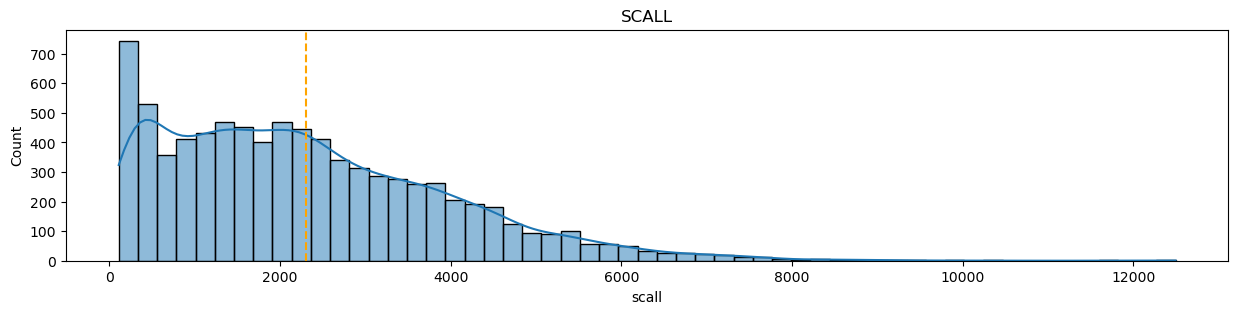

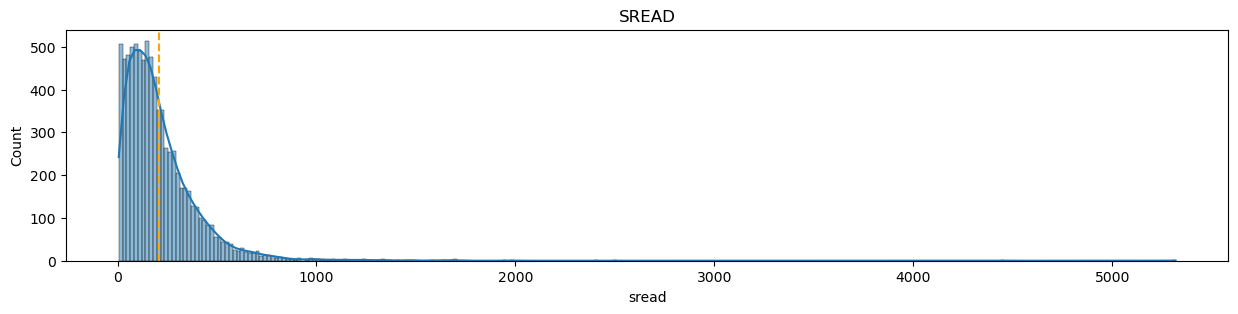

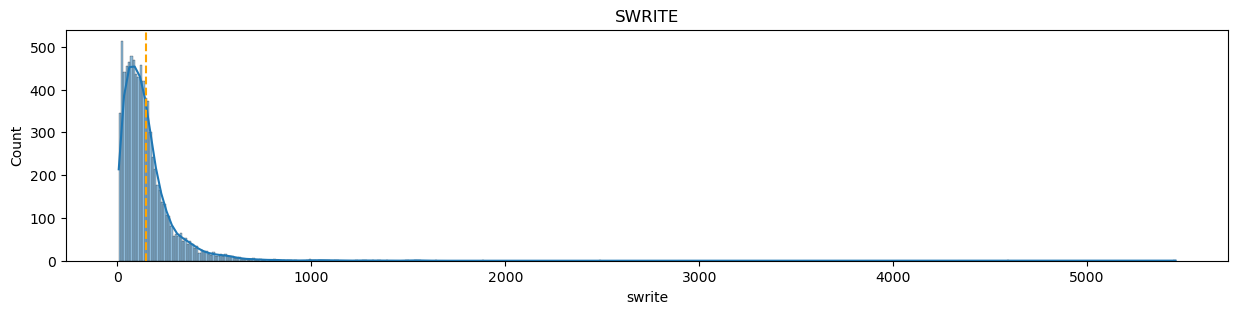

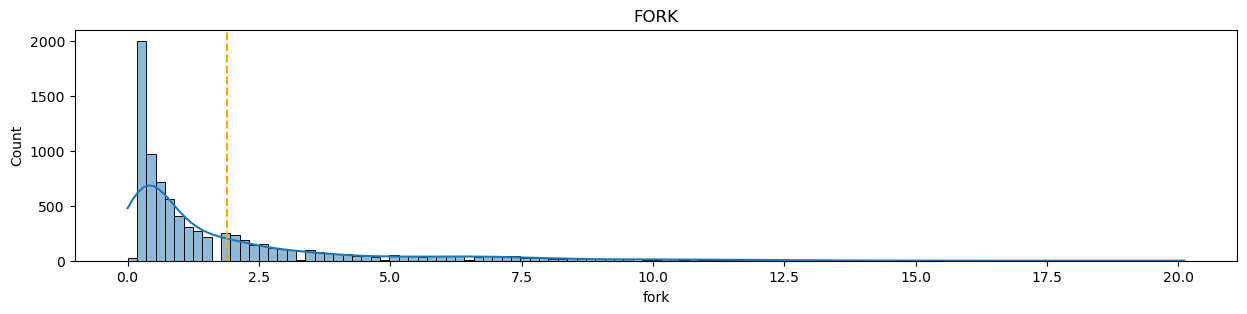

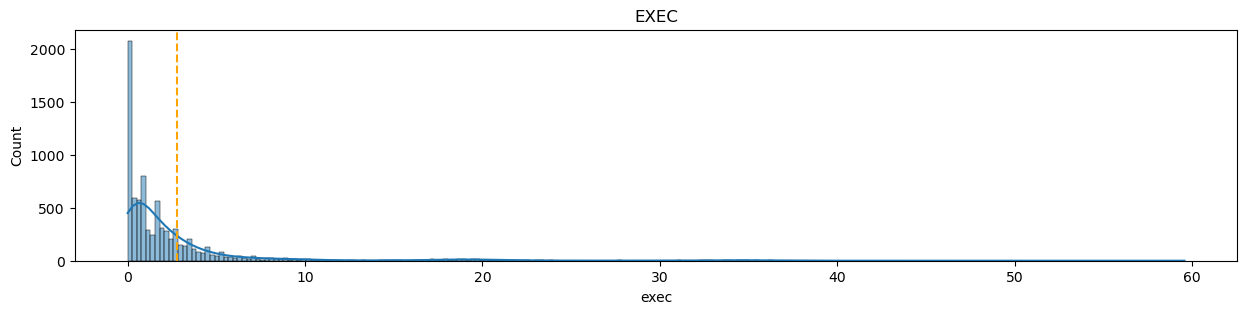

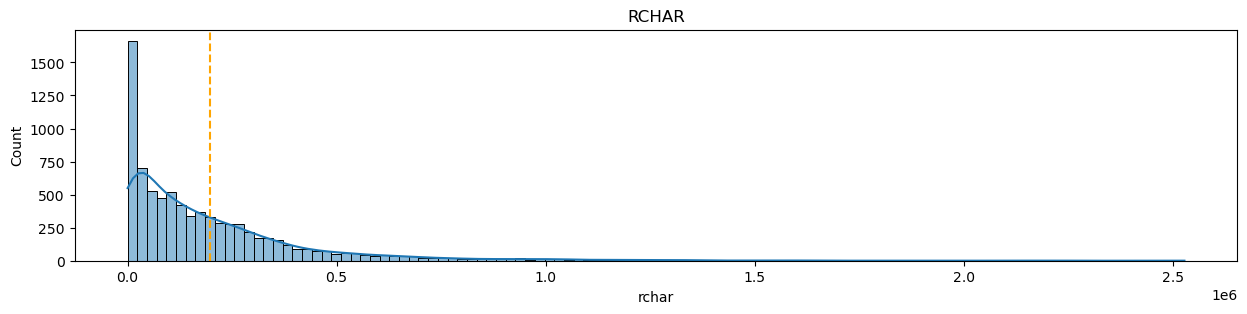

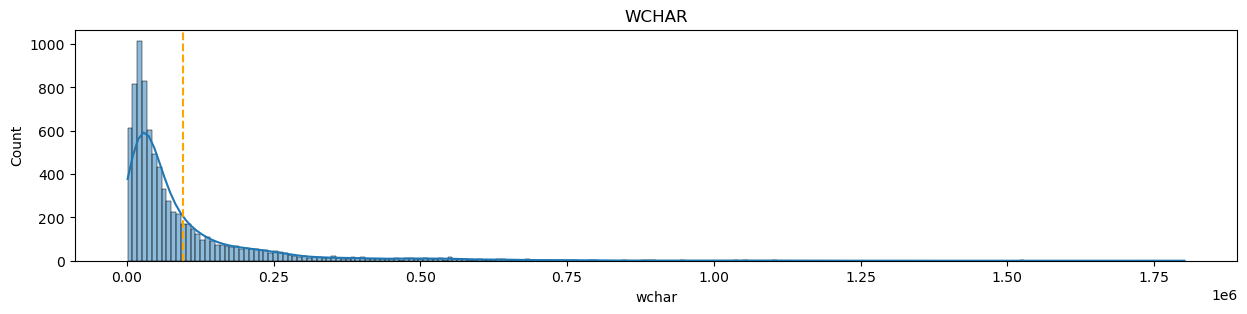

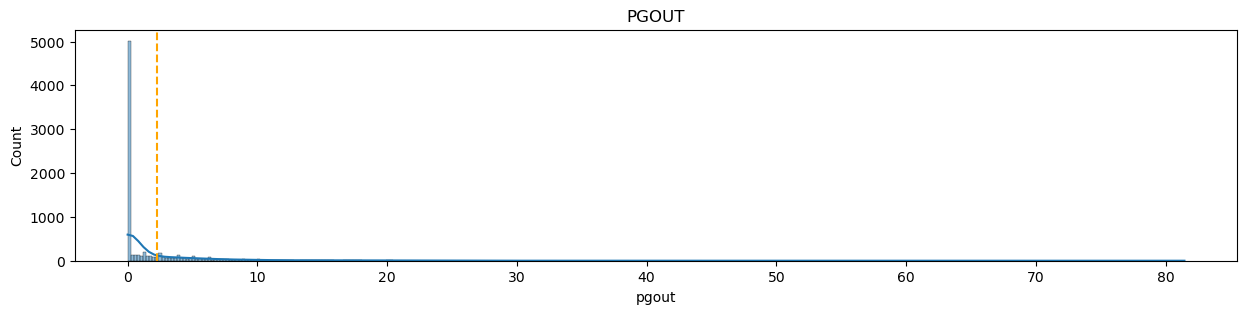

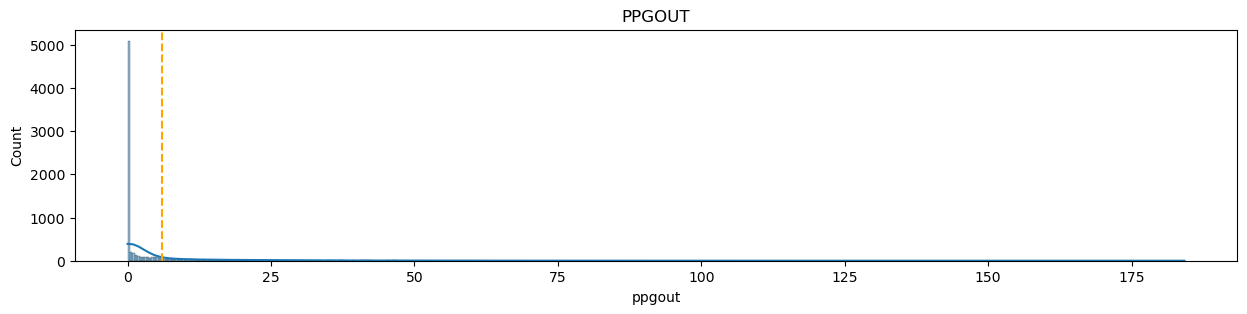

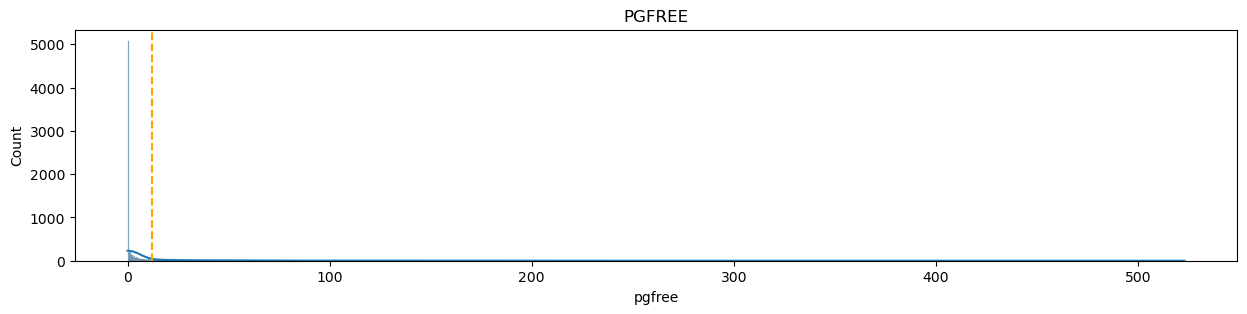

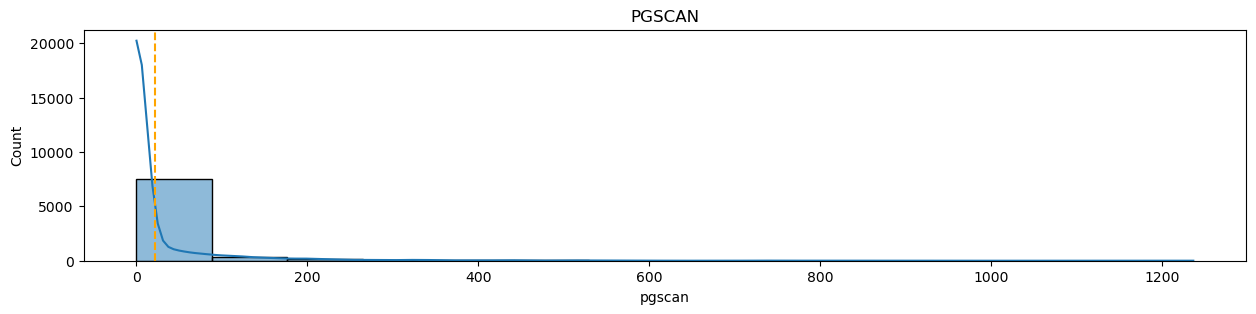

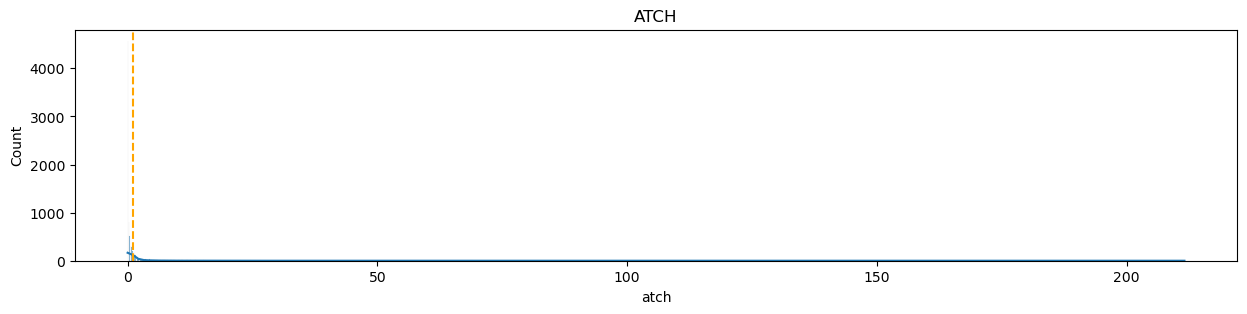

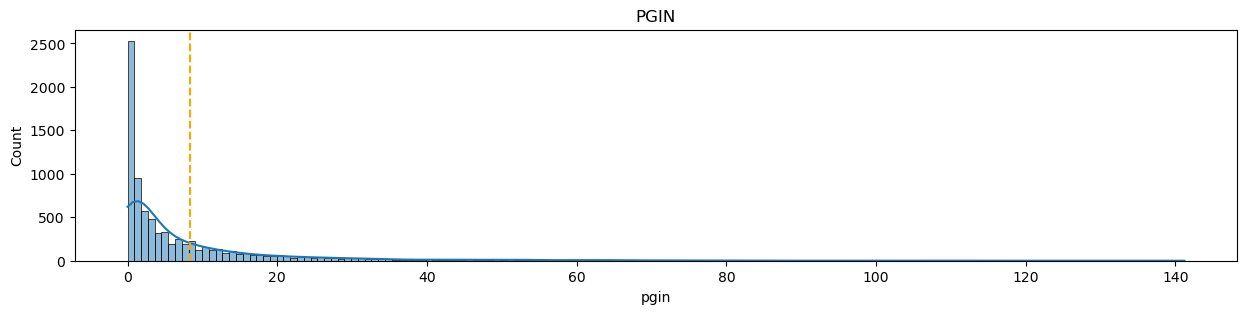

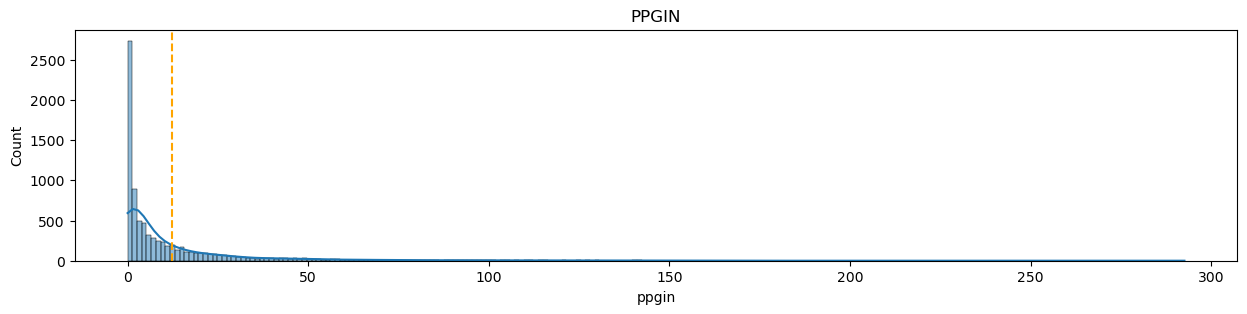

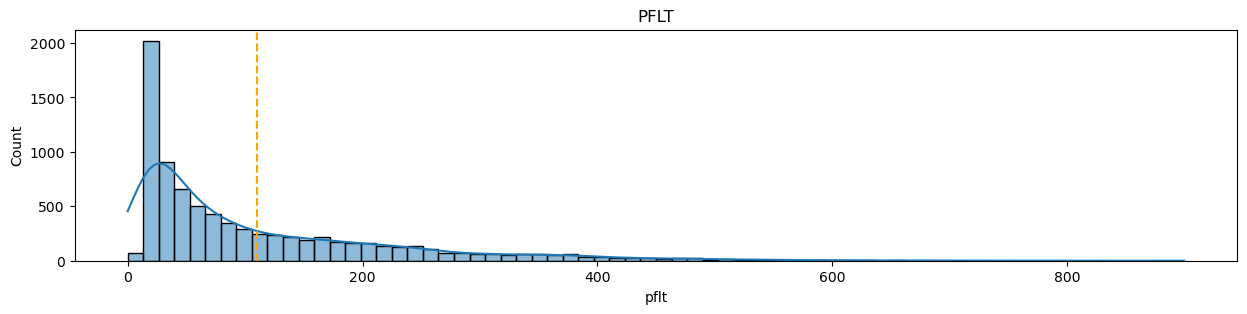

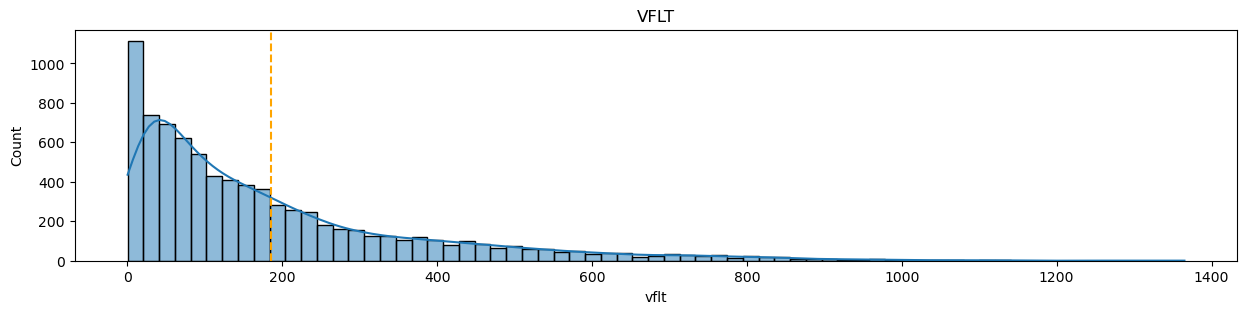

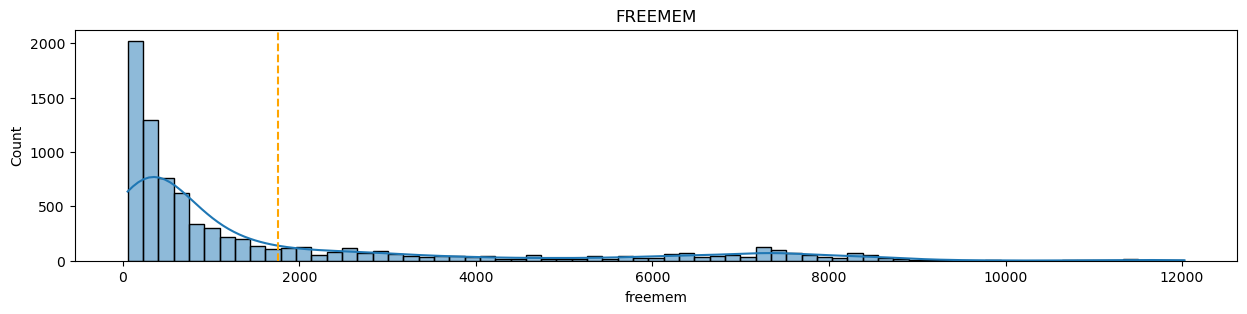

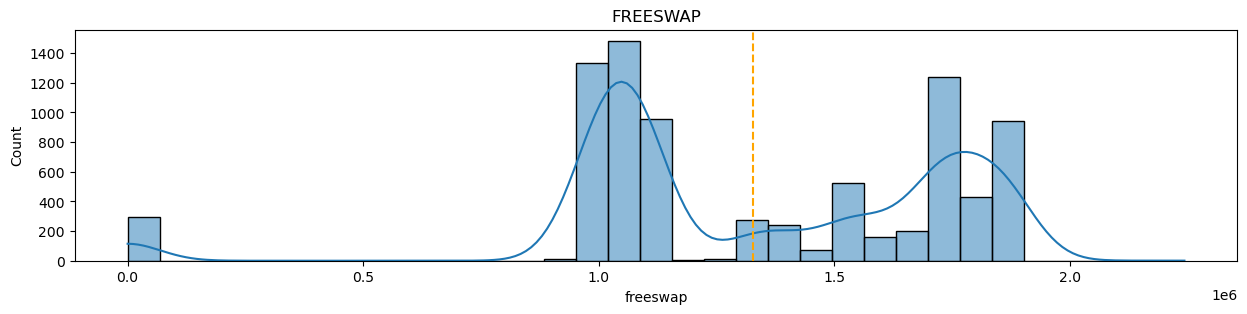

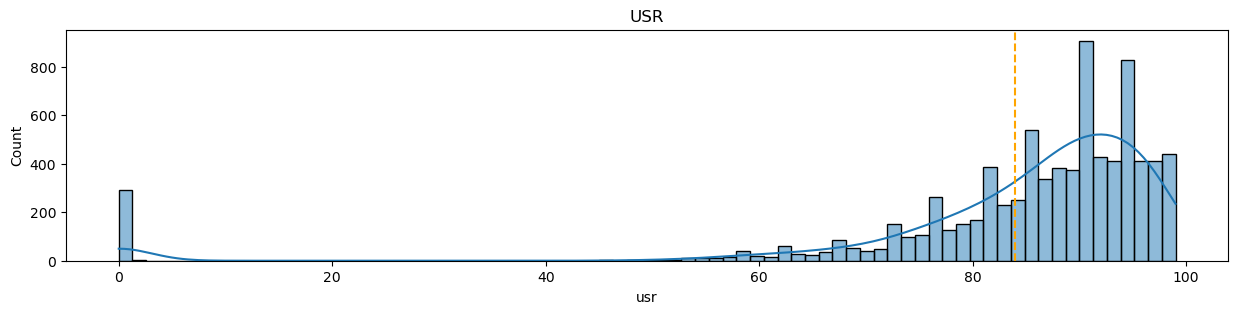

In [12]:
def plot_hist(df,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.histplot(data = df,x = i,kde=True)
        axes.set_title(i.upper())
        axes.axvline(x = df[i].mean(),color = 'orange',linestyle = '--')
plot_hist(df,num)

Bivariate Analysis

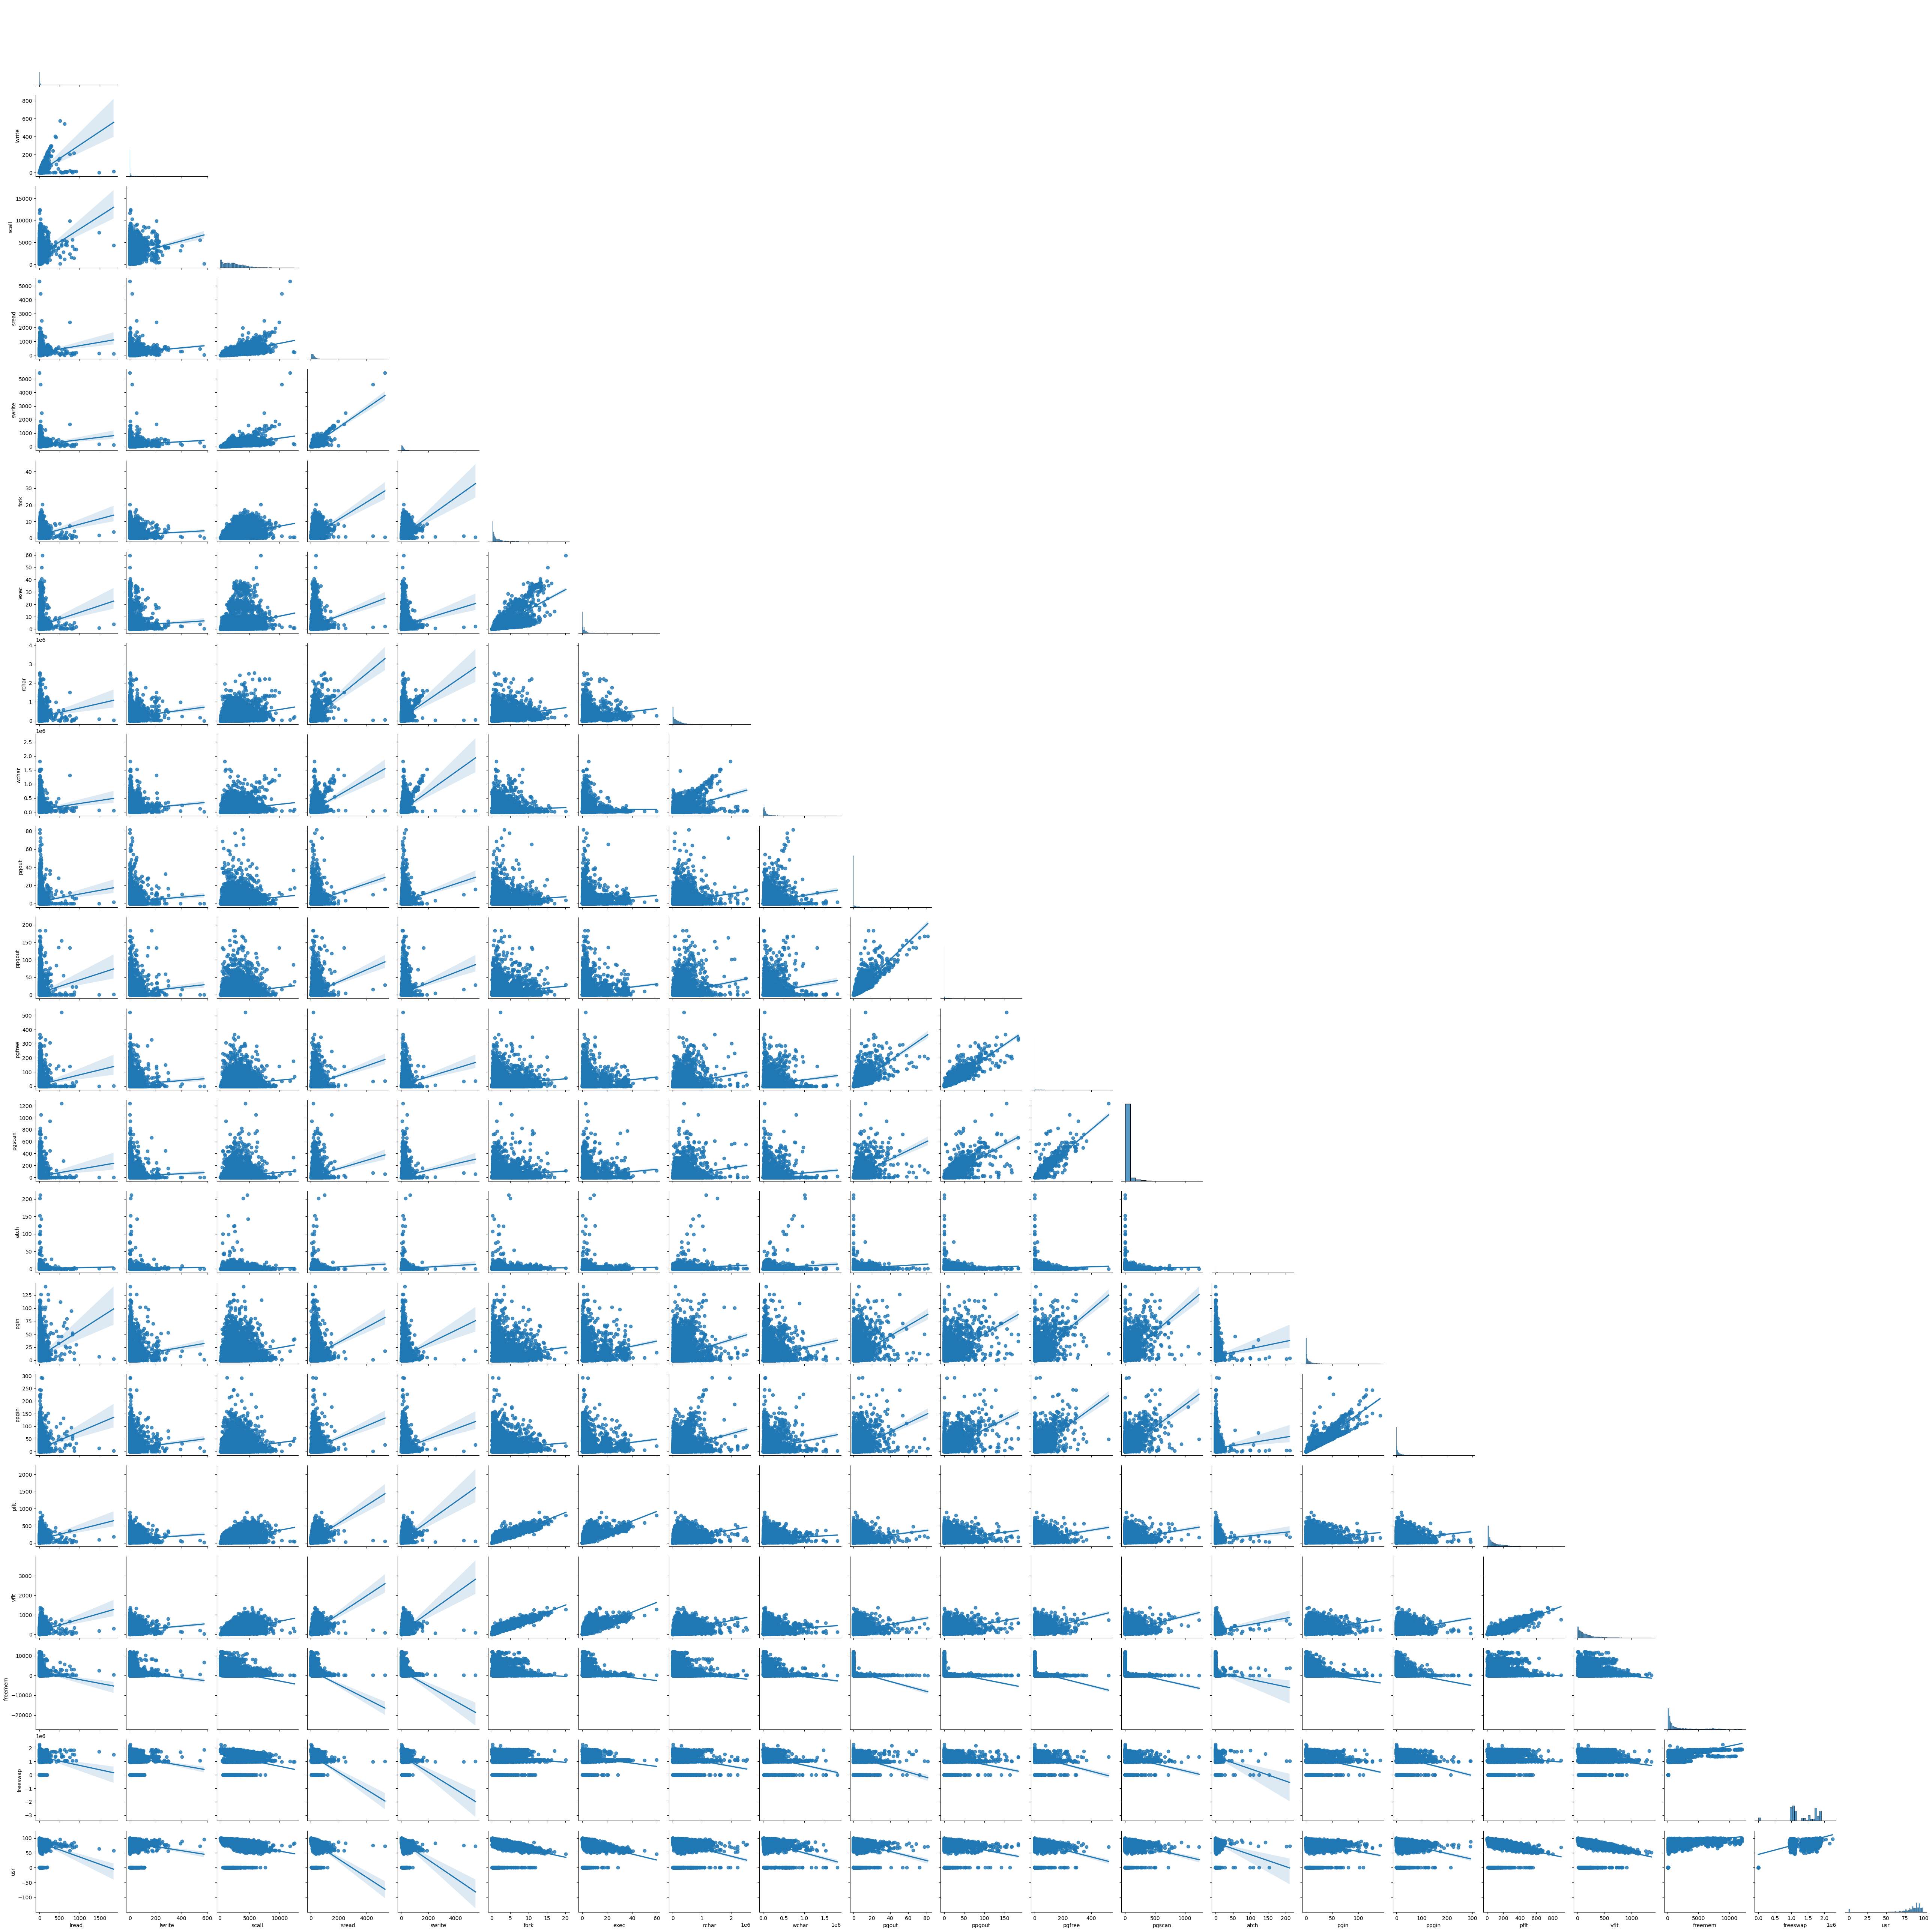

In [4]:
sns.pairplot(data=df,kind="reg",corner=True)

C:\Users\jayee\AppData\Local\Temp\ipykernel_18836\3843364543.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes = plt.subplots(figsize = (15,3))


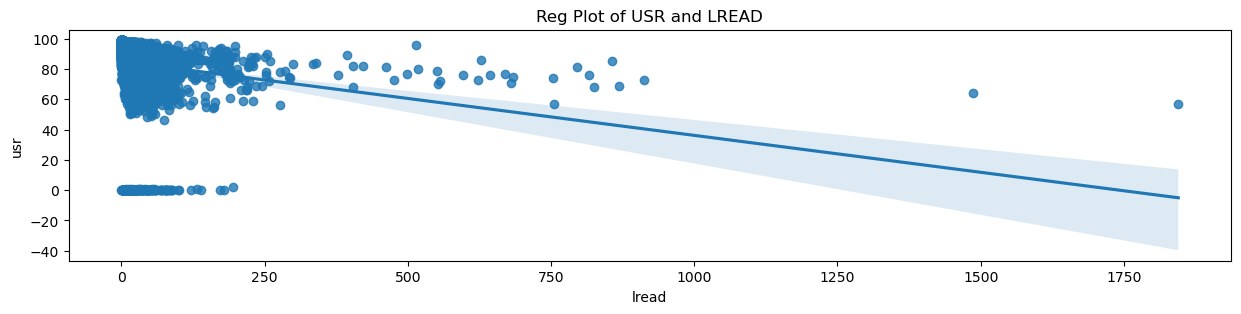

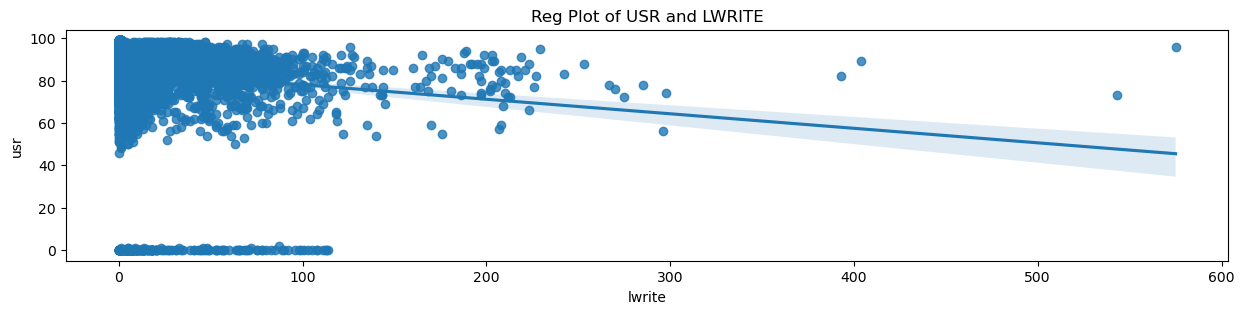

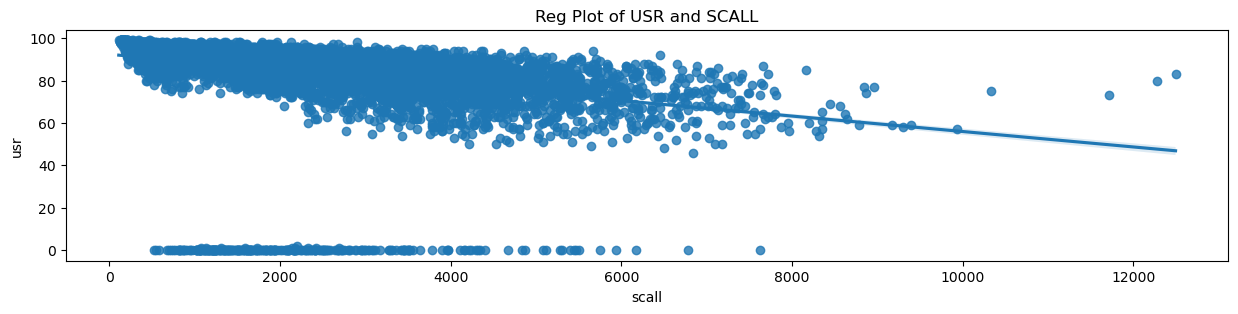

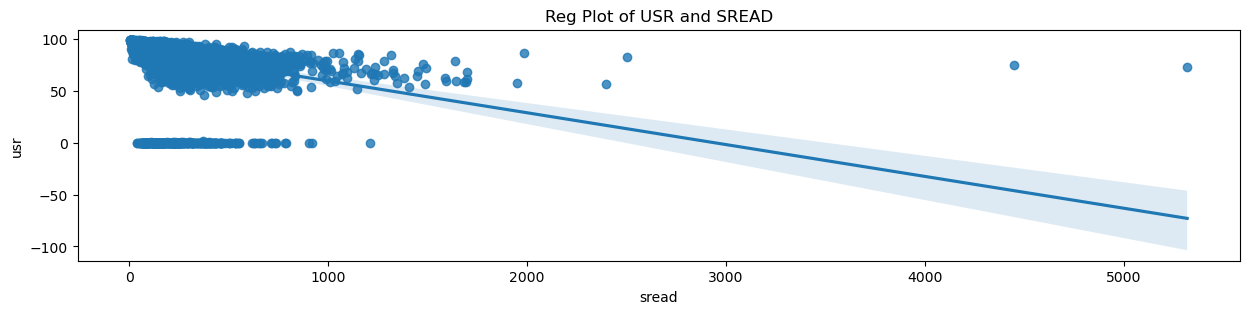

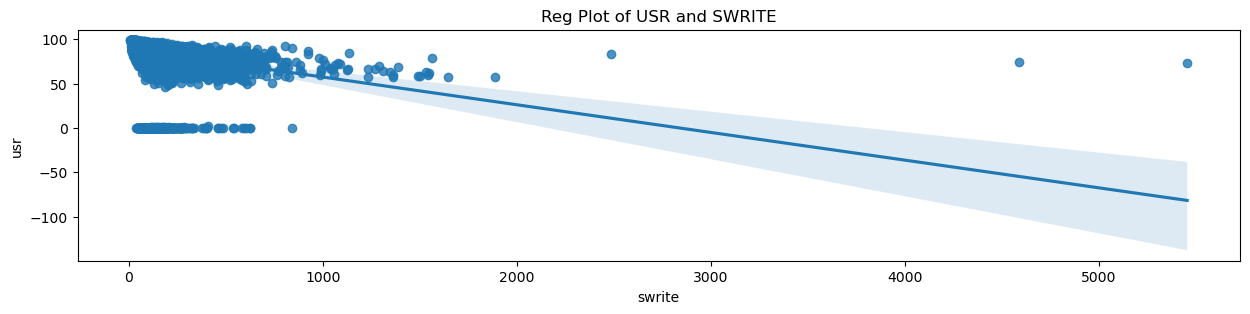

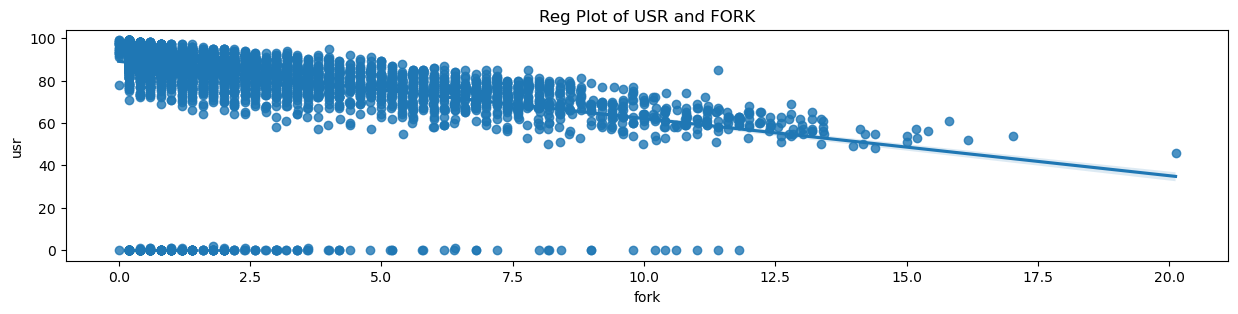

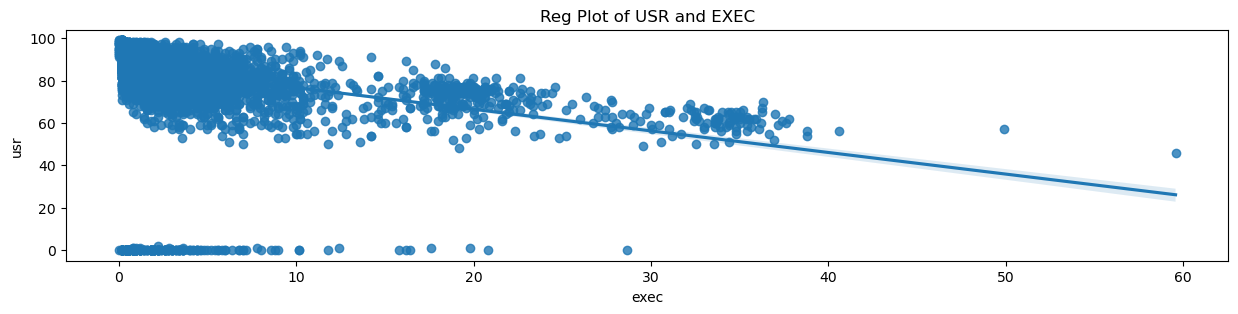

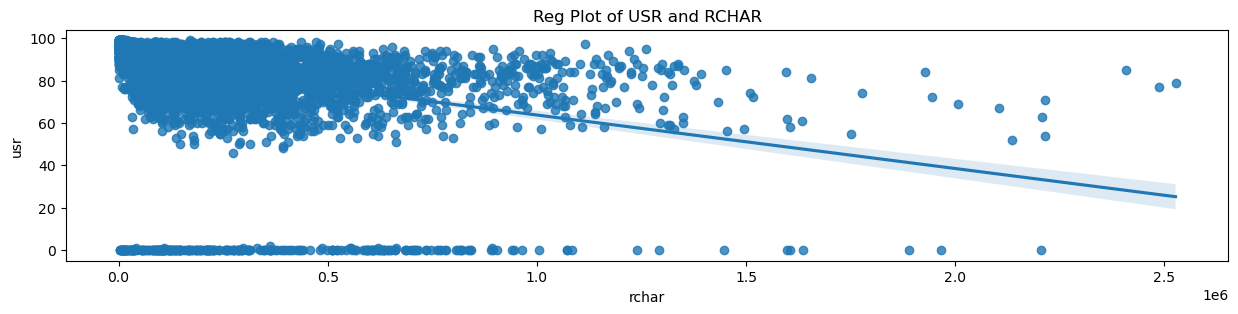

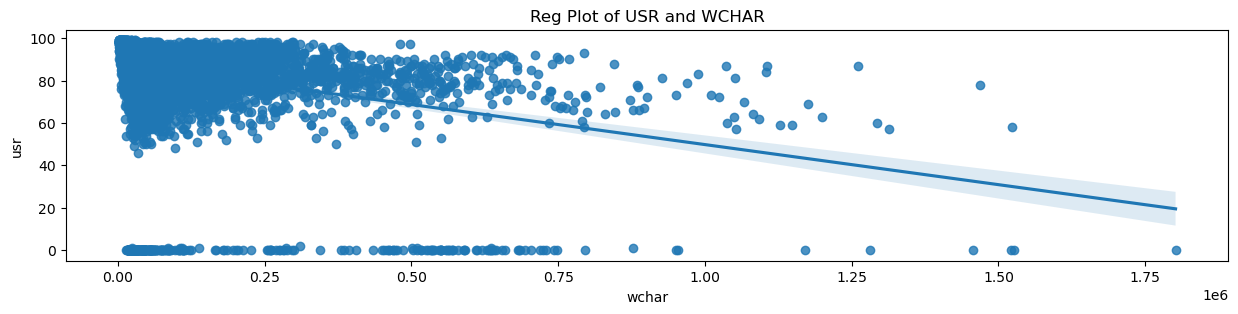

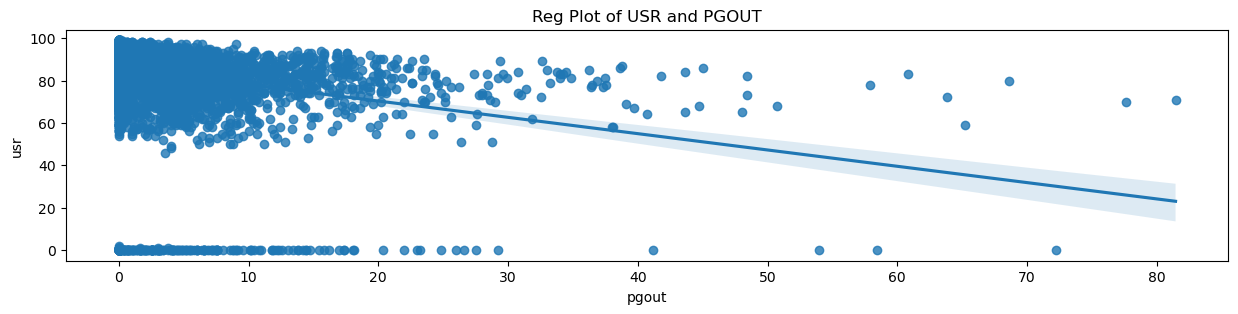

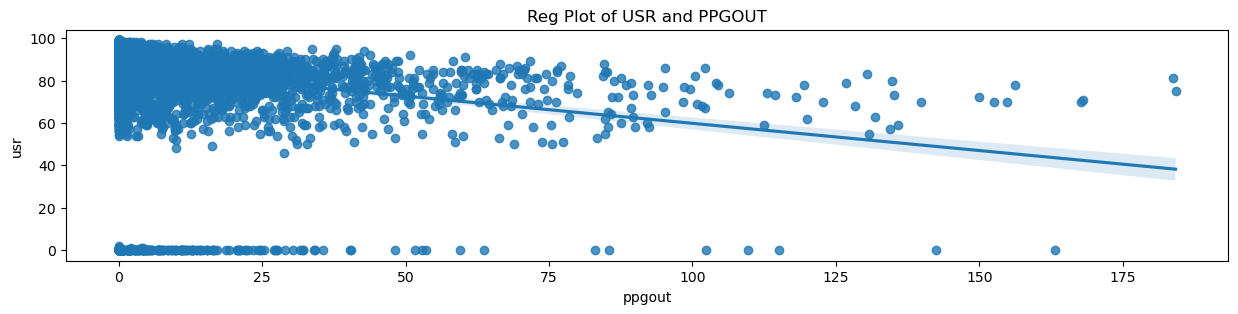

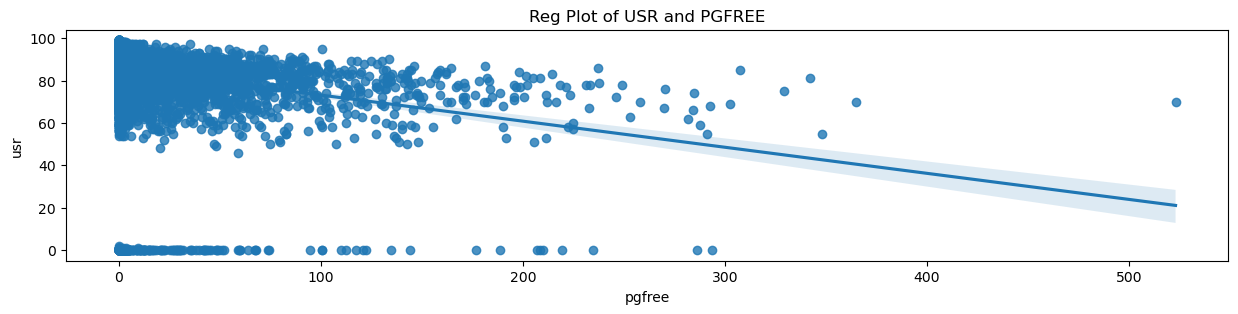

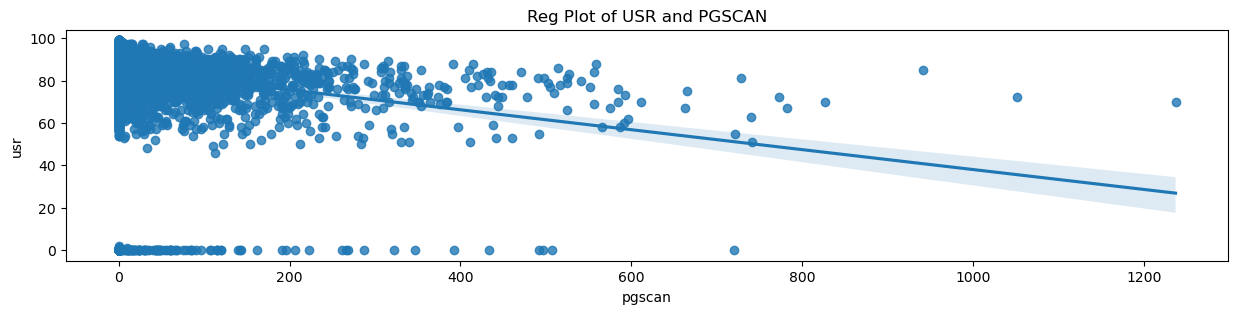

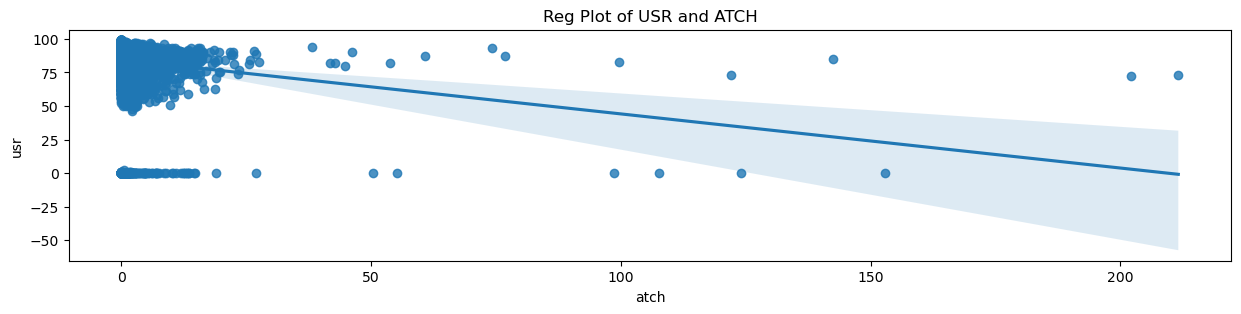

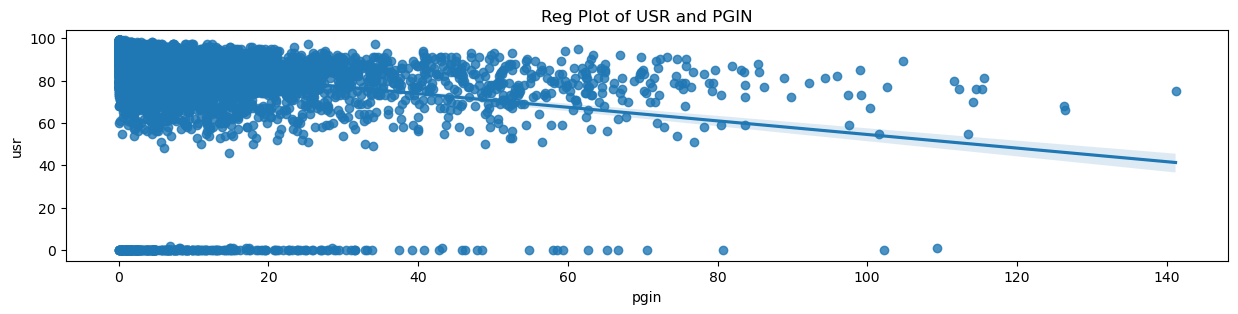

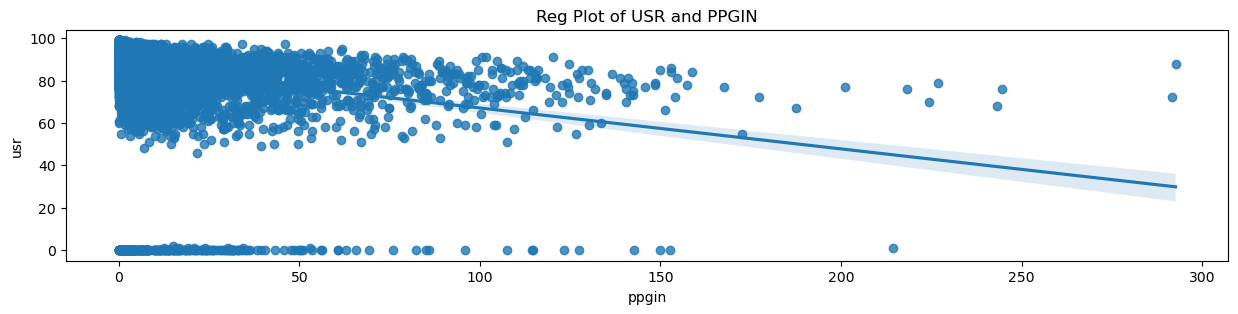

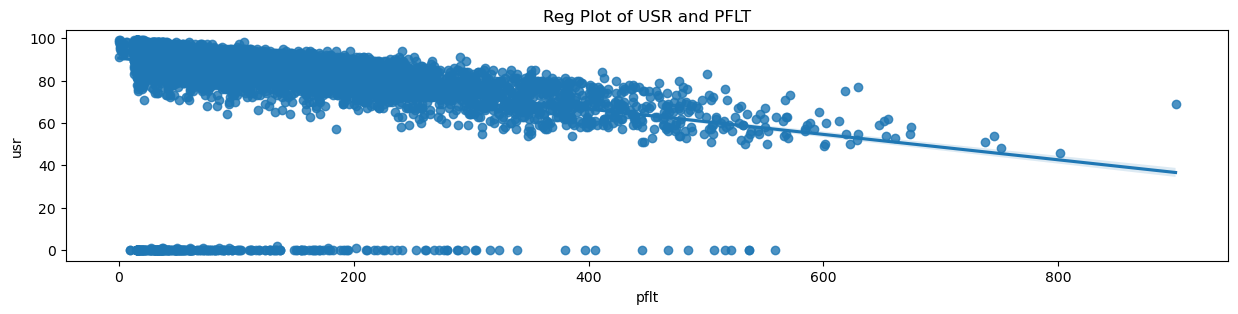

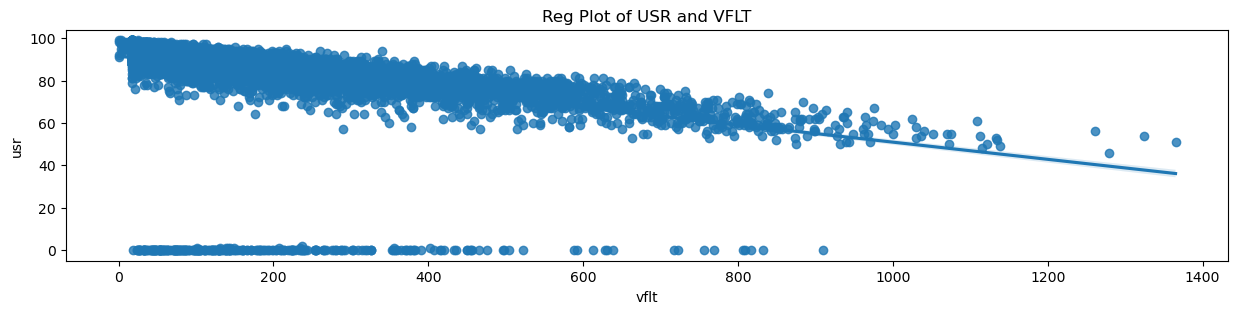

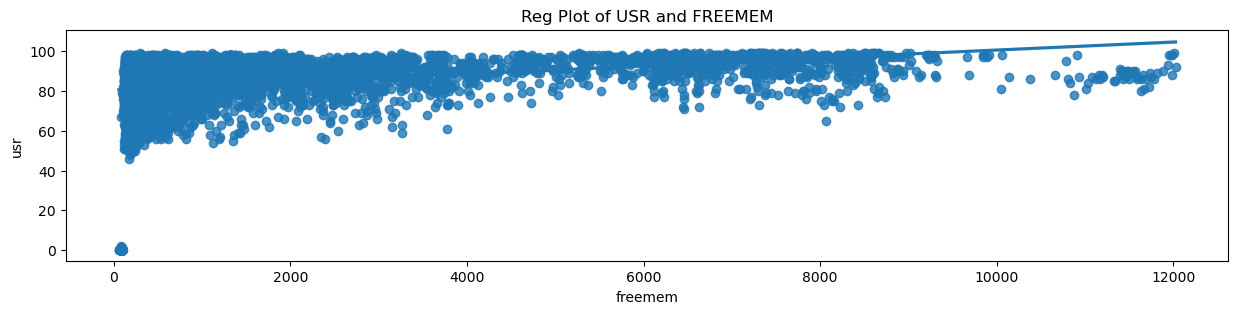

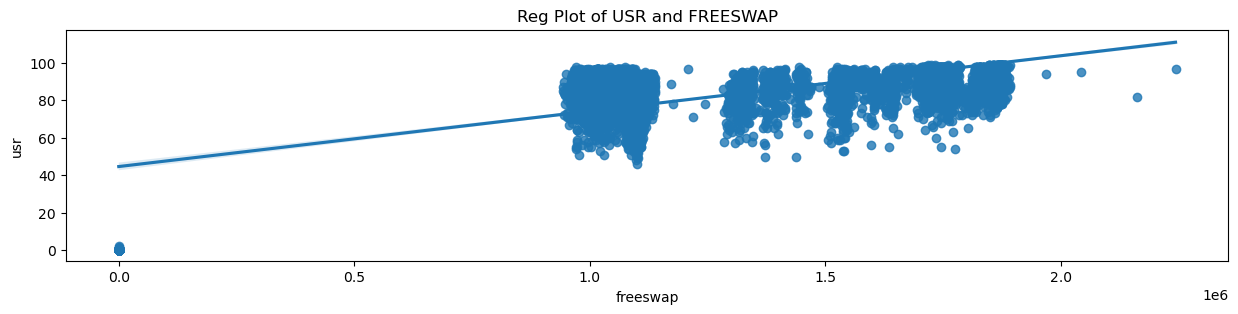

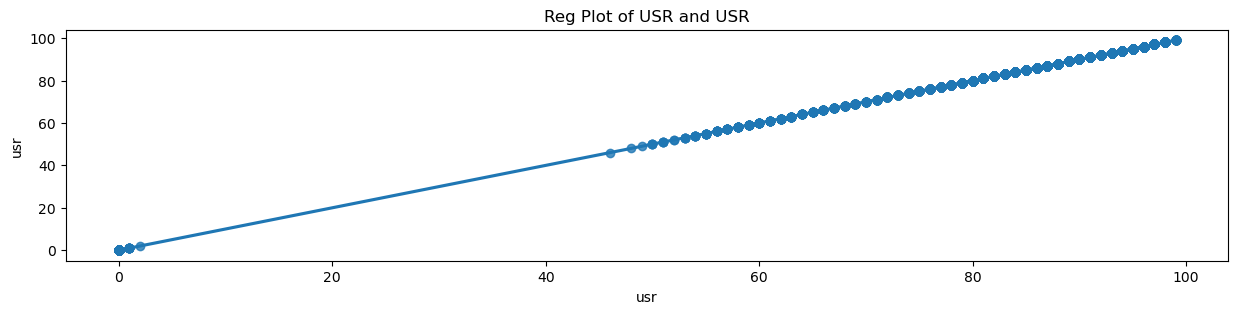

In [246]:
def plot_reg(df):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.regplot(data = df.drop("runqsz",axis=1),x = i,y=df.usr)
        axes.set_title("Reg Plot of USR and {}".format(i.upper()))
plot_reg(df)

In [6]:
corr=df.drop("runqsz",axis=1).corr()

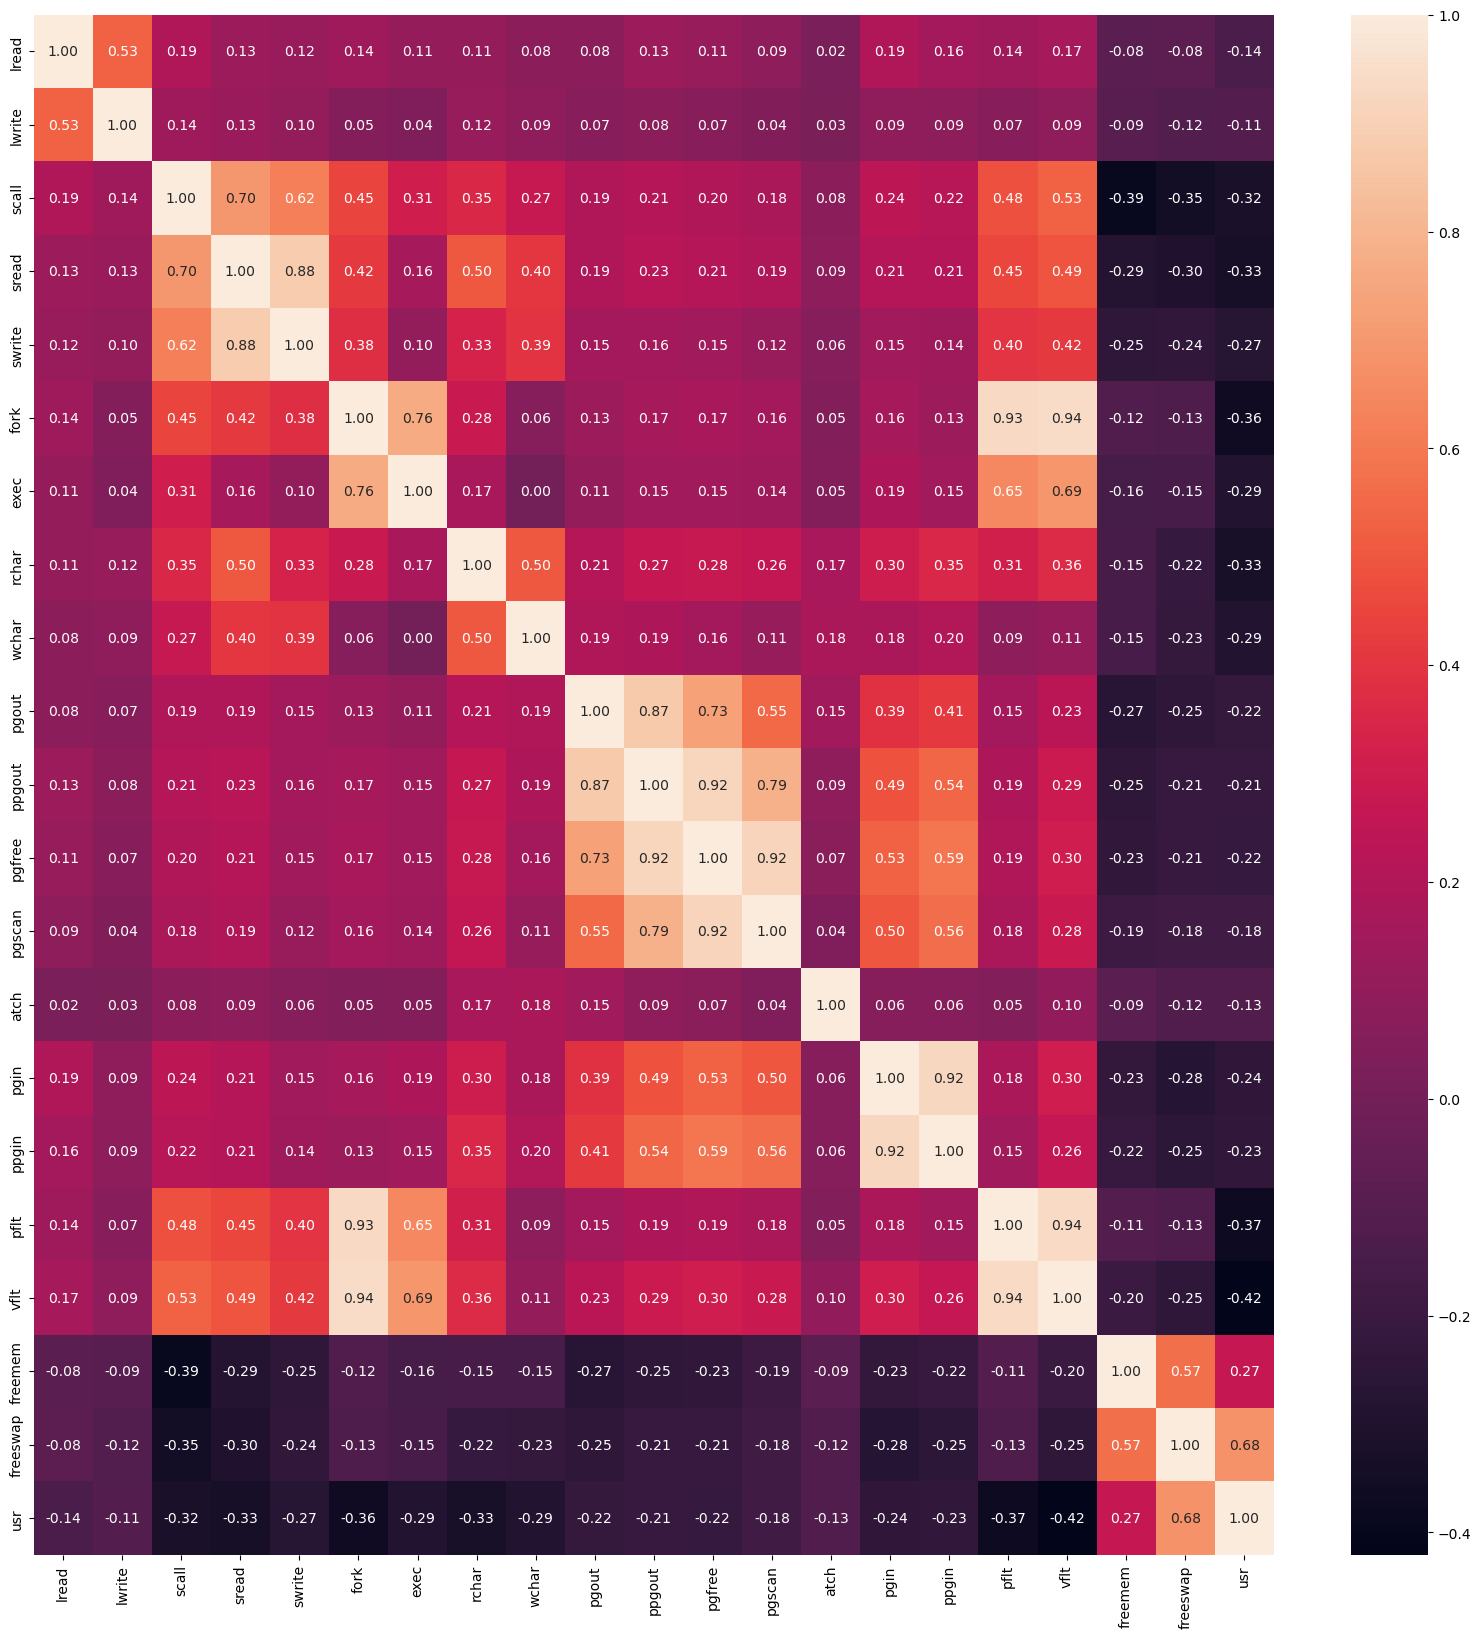

In [7]:
fig,axes=plt.subplots(figsize=(20,20))
ht=sns.heatmap(corr,fmt=".2f",annot=True)
plt.show()

Multivariate Analysis

<Axes: xlabel='lread', ylabel='usr'>

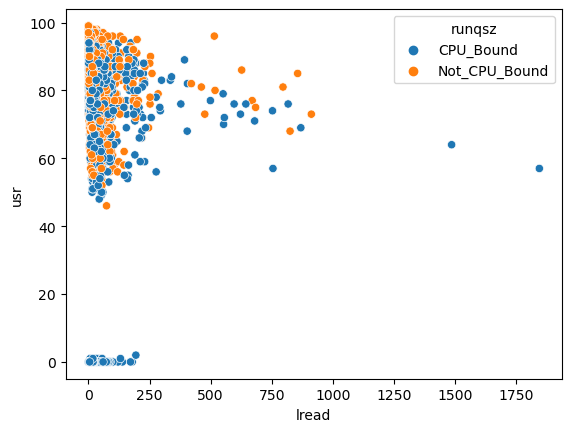

In [67]:
sns.scatterplot(data=df,y="usr",x="lread",hue="runqsz")

<Axes: xlabel='scall', ylabel='usr'>

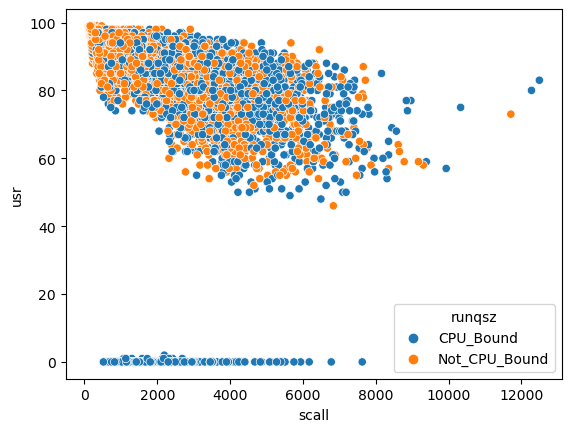

In [60]:
sns.scatterplot(data=df,y="usr",x="scall",hue="runqsz")

<Axes: xlabel='fork', ylabel='usr'>

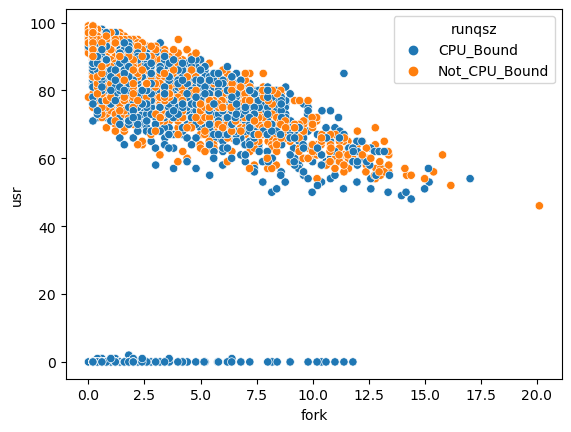

In [61]:
sns.scatterplot(data=df,y="usr",x="fork",hue="runqsz")

<Axes: xlabel='pgout', ylabel='usr'>

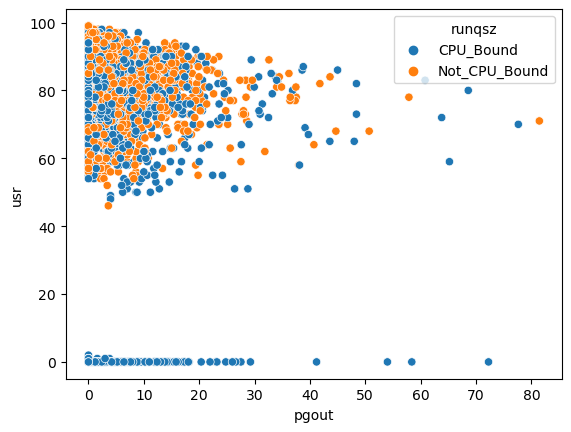

In [62]:
sns.scatterplot(data=df,y="usr",x="pgout",hue="runqsz")

<Axes: xlabel='freemem', ylabel='usr'>

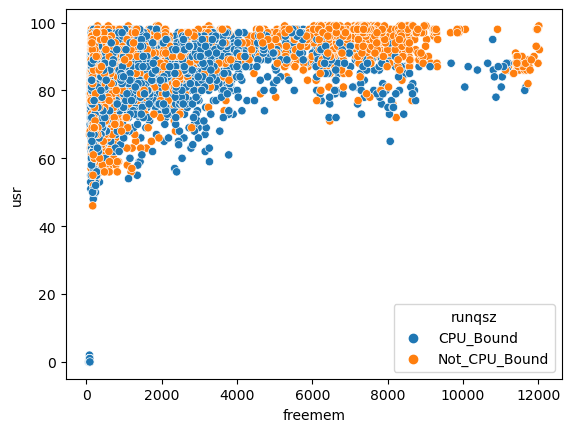

In [63]:
sns.scatterplot(data=df,y="usr",x="freemem",hue="runqsz")

<Axes: xlabel='freeswap', ylabel='usr'>

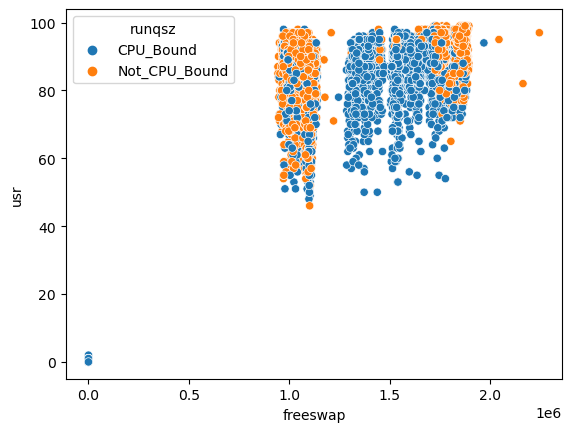

In [65]:
sns.scatterplot(data=df,y="usr",x="freeswap",hue="runqsz")

<Axes: xlabel='wchar', ylabel='usr'>

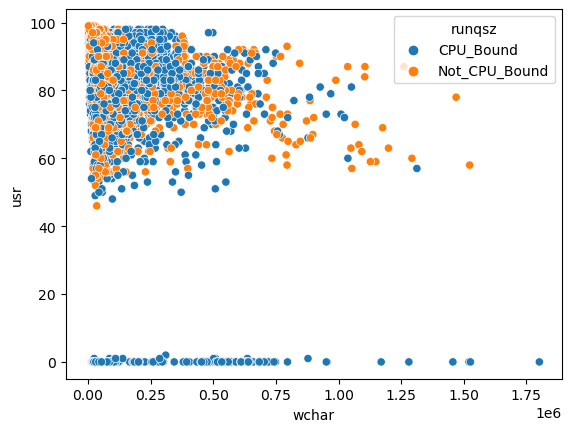

In [69]:
sns.scatterplot(data=df,y="usr",x="wchar",hue="runqsz")

Imputing missing values with median

In [170]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(df[num])

C:\Users\jayee\anaconda3\Lib\site-packages\sklearn\impute\_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [171]:
df[num]=imputer.transform(df[num])

In [10]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

Encoding

In [172]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.runqsz=le.fit_transform(df.runqsz)
df.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem   freeswap  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40       0   4670.0  1730946.0   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83       1   7278.0  1869002.0   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20       1    702.0  1021237.0   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80       1   7248.0  1863704.0   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60       1    633.0  1760253.0   

    usr  
0  95.0  
1  97.0  
2  87.0  
3  98.0  
4  90.0  

[5 rows x 22 columns]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   int32  
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

Check and treat outliers

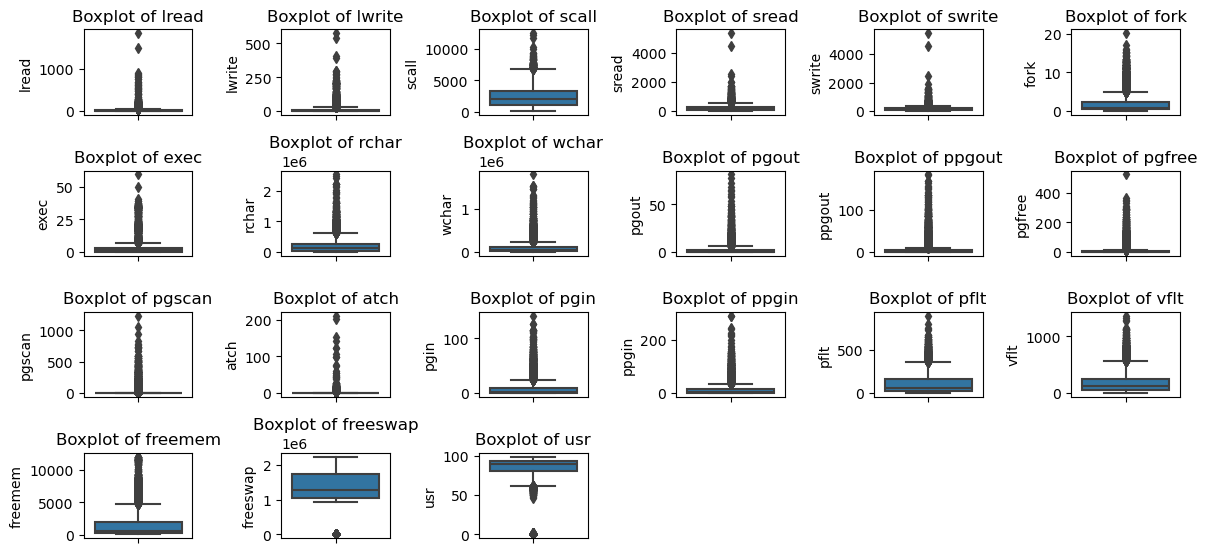

In [73]:
plt.figure(figsize=(12,7))
feature_list=num
for i in range(len(feature_list)):
    plt.subplot(5,6,i+1)
    sns.boxplot(y=df[feature_list[i]],data=df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [82]:
df_out=df.copy()
df_out.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem  freeswap  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40       0     4670   1730946   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83       1     7278   1869002   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20       1      702   1021237   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80       1     7248   1863704   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60       1      633   1760253   

   usr  
0   95  
1   97  
2   87  
3   98  
4   90  

[5 rows x 22 columns]

In [83]:
def outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    IQR_L = Q3-(1.5 * IQR)
    IQR_U = Q3+(1.5 * IQR)
    return IQR_L,IQR_U

In [84]:
for i in df_out.columns:
    LL,UL = outliers(df_out[i])
    df_out[i] = np.where(df_out[i]<LL,LL,df_out[i])
    df_out[i] = np.where(df_out[i]>UL,UL,df_out[i])

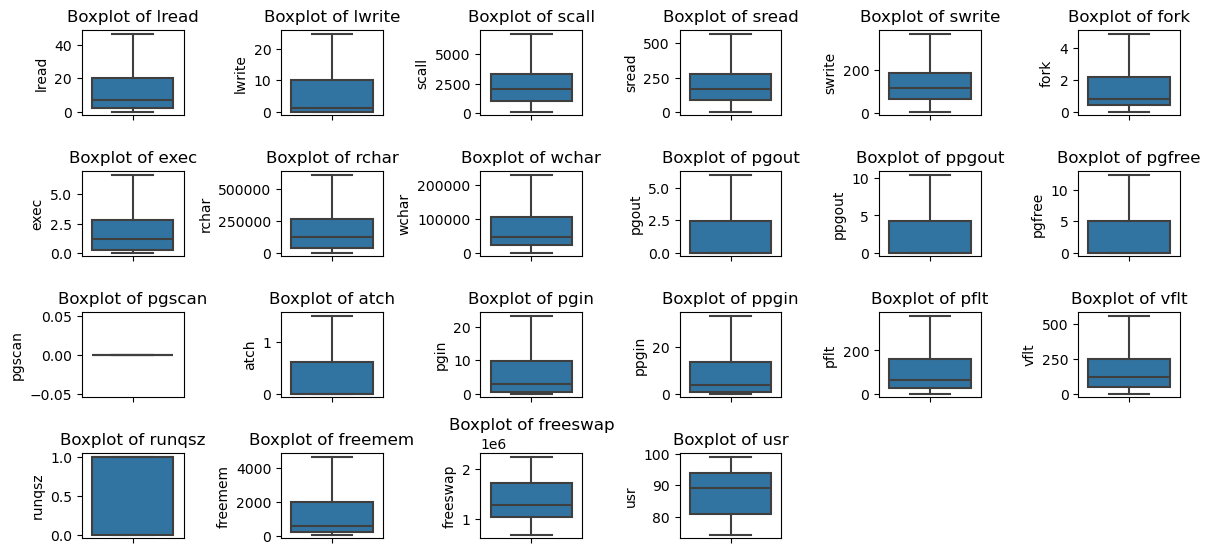

In [85]:
plt.figure(figsize=(12,7))
feature_list1=df_out.columns
for i in range(len(feature_list1)):
    plt.subplot(5,6,i+1)
    sns.boxplot(y=df_out[feature_list1[i]],data=df_out)
    plt.title('Boxplot of {}'.format(feature_list1[i]))
    plt.tight_layout()


Lets add pflt and vflt and make it a single feature

In [ ]:
Feature Reduction
We are removing pflt,pgin,pgscan,swrite,pgout because of strong collinearity

In [173]:
df.drop(["pflt","pgin","pgscan","swrite","pgout"],axis=1,inplace=True)

In [14]:
df.shape

(8192, 17)

In [15]:
for i in df.columns:
        print(f"Number of Zeros in {i}:",np.sum(df[i]==0))

Number of Zeros in lread: 675
Number of Zeros in lwrite: 2684
Number of Zeros in scall: 0
Number of Zeros in sread: 0
Number of Zeros in fork: 21
Number of Zeros in exec: 21
Number of Zeros in rchar: 0
Number of Zeros in wchar: 0
Number of Zeros in ppgout: 4878
Number of Zeros in pgfree: 4869
Number of Zeros in atch: 4575
Number of Zeros in ppgin: 1220
Number of Zeros in vflt: 0
Number of Zeros in runqsz: 3861
Number of Zeros in freemem: 0
Number of Zeros in freeswap: 0
Number of Zeros in usr: 283


As we see here there are zeros in usr which is not possible in reality. So will impute it with mean

In [174]:
df.usr=np.where(df.usr==0,df.usr.median(),df.usr)

In [175]:
for i in df.columns:
        print(f"Number of Zeros in {i}:",np.sum(df[i]==0))

Number of Zeros in lread: 675
Number of Zeros in lwrite: 2684
Number of Zeros in scall: 0
Number of Zeros in sread: 0
Number of Zeros in fork: 21
Number of Zeros in exec: 21
Number of Zeros in rchar: 0
Number of Zeros in wchar: 0
Number of Zeros in ppgout: 4878
Number of Zeros in pgfree: 4869
Number of Zeros in atch: 4575
Number of Zeros in ppgin: 1220
Number of Zeros in vflt: 0
Number of Zeros in runqsz: 3861
Number of Zeros in freemem: 0
Number of Zeros in freeswap: 0
Number of Zeros in usr: 0


<Axes: >

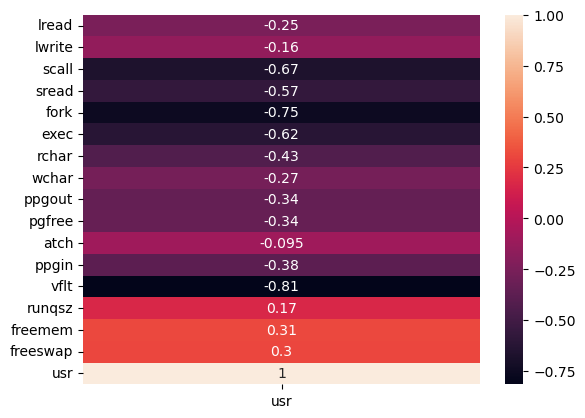

In [18]:
sns.heatmap(df.corr()[["usr"]],annot=True)

We see there is a postive correlation between runqsz,freemem, freeswap and usr, negative correlation with rest of the features

Split the data for train and test

In [21]:
X=df.drop("usr",axis=1)
Y=df.pop("usr")

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
len(X_train)

5734

In [24]:
len(X_test)

2458

In [99]:
import statsmodels.api as sm

In [25]:
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train)
olsres=model.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1387.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:27:44   Log-Likelihood:                -16454.
No. Observations:                5734   AIC:                         3.294e+04
Df Residuals:                    5717   BIC:                         3.305e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.1320      0.291    337.683      0.0

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
vif=pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print(vif)

const       26.535831
lread        1.429992
lwrite       1.398930
scall        2.398646
sread        2.517531
fork        15.142340
exec         2.816985
rchar        1.752991
wchar        1.476575
ppgout       6.977430
pgfree       7.766112
atch         1.067207
ppgin        1.801928
vflt        14.258704
runqsz       1.114677
freemem      1.663052
freeswap     1.716200
dtype: float64


vif is more than 5 for fork,ppgout,pgfree and vflt. This indicates that these features are related to one or more independent variables. We can drop the features one by one and check R-squared and adj R squared value to ensure the model performance uneffected.

In [29]:
X_train1=X_train.drop("fork",axis=1)
model1=sm.OLS(y_train,X_train1)
olsres1=model1.fit()
print(olsres1.rsquared)
print(olsres1.rsquared_adj)

0.7948451052069458
0.7943069234262715


In [30]:
vif=pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns)
print(vif)

const       24.902163
lread        1.424222
lwrite       1.388689
scall        2.360719
sread        2.480373
exec         2.146882
rchar        1.745442
wchar        1.472695
ppgout       6.970219
pgfree       7.668101
atch         1.055453
ppgin        1.738296
vflt         3.011776
runqsz       1.114264
freemem      1.662971
freeswap     1.638477
dtype: float64


In [31]:
X_train2=X_train1.drop("pgfree",axis=1)
model2=sm.OLS(y_train,X_train2)
olsres2=model2.fit()
print(olsres2.rsquared)
print(olsres2.rsquared_adj)

0.7947827874342934
0.7942804197168744


In [32]:
vif=pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print(vif)

const       24.890392
lread        1.413776
lwrite       1.388301
scall        2.360312
sread        2.475375
exec         2.128416
rchar        1.742458
wchar        1.463692
ppgout       1.561177
atch         1.053808
ppgin        1.588103
vflt         2.958116
runqsz       1.114212
freemem      1.662138
freeswap     1.638173
dtype: float64


After dropping few features we see that vif has significantly come down below 5 for all the variables. R-squared and adj R-squared value are still
good. Hence we can conclude that this linear regression model is free of the multi-colinearity.

In [33]:
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1582.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:47:57   Log-Likelihood:                -16458.
No. Observations:                5734   AIC:                         3.295e+04
Df Residuals:                    5719   BIC:                         3.305e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.3177      0.282    349.114      0.0

From the summary we see that p-value for lwrite coefficient is 0.64 i.e which is greater than 0.5. Hence we fail to reject
the Null hypothesis(predictor variable is not significant). So we are going to remove lwrite as it is not significant variable.


In [35]:
X_train2.drop("lwrite",axis=1,inplace=True)

In [36]:
model3=sm.OLS(y_train,X_train2)
olsres3=model3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1704.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:52:16   Log-Likelihood:                -16458.
No. Observations:                5734   AIC:                         3.294e+04
Df Residuals:                    5720   BIC:                         3.304e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.3025      0.280    351.508      0.0

We see that the relationship between atch,freemem features individually with usr is positive as the coefficients are positive. 
For the rest of the features the relationship is negative.

R-squared and adjusted R-squared of the model are 0.79, which shows that the model is able to explain ~79% variance in the data. This is quite good.

A unit increase in system execution calls , cpu usage time in user mode decreases by 0.29 unit.

A unit increase in available memory pages for user process , cpu usage time in user mode increases by 0.0002 unit. 

Print the linear regression equation

In [37]:
olsres3.params

const       9.830249e+01
lread      -1.240314e-02
scall      -1.433482e-03
sread      -2.193644e-03
exec       -2.924775e-01
rchar      -6.314374e-07
wchar      -5.924583e-06
ppgout     -6.278993e-03
atch        2.357910e-02
ppgin      -5.283355e-02
vflt       -2.380322e-02
runqsz     -9.728938e-02
freemem     1.852290e-04
freeswap   -7.048126e-07
dtype: float64

Get MSE & RMSE for the train data set

In [114]:
from sklearn.metrics import mean_squared_error


In [78]:
mse_train=mean_squared_error(y_train,olsres3.predict(X_train2))
print(mse_train)

18.22359252014013


In [79]:
rmse_train=np.sqrt(mse_train)
print(rmse_train)

4.268909992040138


Get MSE & RMSE for the test data set

In [80]:
X_test.drop(["fork","pgfree","lwrite"],axis=1,inplace=True)

In [81]:
X_test.shape

(2458, 13)

In [82]:
X_test=sm.add_constant(X_test)

In [83]:
mse_test_sm=mean_squared_error(y_test,olsres3.predict(X_test))
rmse_test_sm=np.sqrt(mse_test_sm)
print(f"MSE and RMSE of Test data using sm LR are respectively",mse_test_sm,rmse_test_sm )

MSE and RMSE of Test data using sm LR are respectively 18.035204096076708 4.246787503051772


Building Linear Regression model using Sklearn

In [39]:
from sklearn.linear_model import LinearRegression

In [109]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [110]:
lm= LinearRegression()
lr=lm.fit(X1_train,y1_train)
print(f"R-squared for train data",lr.score(X1_train,y1_train))
print(f"R-squared for test data",lr.score(X1_test,y1_test))

R-squared for train data 0.7951039212466214
R-squared for test data 0.7782530646836113


In [111]:
vif=pd.Series([variance_inflation_factor(X1_train.values,i) for i in range(X1_train.shape[1])],index=X1_train.columns)
print(vif)

lread        1.610853
lwrite       1.672089
scall        6.539368
sread        5.179706
fork        22.347135
exec         3.579862
rchar        2.910980
wchar        2.108695
ppgout       8.016772
pgfree       8.808300
atch         1.106656
ppgin        2.336786
vflt        25.757943
runqsz       2.055886
freemem      2.436271
freeswap     5.403828
dtype: float64


In [112]:
X2_train=X1_train.drop("vflt",axis=1)
X2_test=X1_test.drop("vflt",axis=1)
lr1=lm.fit(X2_train,y1_train)
print(f"R-squared for train data",lr1.score(X2_train,y1_train))
print(f"R-squared for test data",lr1.score(X2_test,y1_test))

R-squared for train data 0.7818863913568892
R-squared for test data 0.766795026807634


In [113]:
vif=pd.Series([variance_inflation_factor(X2_train.values,i) for i in range(X2_train.shape[1])],index=X2_train.columns)
print(vif)

lread       1.607326
lwrite      1.654896
scall       6.027594
sread       5.178162
fork        5.014450
exec        3.511336
rchar       2.858267
wchar       2.097115
ppgout      7.997984
pgfree      8.600571
atch        1.086589
ppgin       2.253606
runqsz      2.046861
freemem     2.436014
freeswap    5.403450
dtype: float64


In [114]:
X3_train=X2_train.drop("pgfree",axis=1)
X3_test=X2_test.drop("pgfree",axis=1)
lr2=lm.fit(X3_train,y1_train)
print(f"R-squared for train data",lr2.score(X3_train,y1_train))
print(f"R-squared for test data",lr2.score(X3_test,y1_test))

R-squared for train data 0.7817274867185682
R-squared for test data 0.7672931010015795


In [115]:
vif=pd.Series([variance_inflation_factor(X3_train.values,i) for i in range(X3_train.shape[1])],index=X3_train.columns)
print(vif)

lread       1.595751
lwrite      1.654340
scall       6.027593
sread       5.173857
fork        4.991515
exec        3.501204
rchar       2.850180
wchar       2.078564
ppgout      1.762694
atch        1.085418
ppgin       2.049453
runqsz      2.046452
freemem     2.435488
freeswap    5.403199
dtype: float64


In [89]:
X4_train=X3_train.drop("scall",axis=1)
X4_test=X3_test.drop("scall",axis=1)
lr3=lm.fit(X4_train,y1_train)
print(f"R-squared for train data",lr3.score(X4_train,y1_train))
print(f"R-squared for test data",lr3.score(X4_test,y1_test))

R-squared for train data 0.7462253617191195
R-squared for test data 0.7371473835090506


In [100]:
X3_train.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'fork', 'exec', 'rchar', 'wchar',
       'ppgout', 'atch', 'ppgin', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [106]:
X3_test.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'fork', 'exec', 'rchar', 'wchar',
       'ppgout', 'atch', 'ppgin', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [91]:
lr2.intercept_

93.66935778836309

In [92]:
lr2.coef_

array([-1.31834990e-02, -6.70288987e-03, -9.49808363e-03, -1.85804378e+00,
       -2.55130915e-01, -9.89880196e-07, -4.55194617e-06, -1.89403752e-02,
       -4.11242719e-03, -7.38745964e-02,  5.79549384e-01,  3.29472483e-04,
        5.33483574e-07])

In [116]:
coefficients=pd.DataFrame(lr2.coef_, columns=["coeff"],index=X3_train.columns).sort_values('coeff',ascending=False)
coefficients

coeff
freemem   1.675882e-04
freeswap  9.435098e-08
rchar    -1.432844e-06
wchar    -4.644194e-06
scall    -1.643534e-03
sread    -2.116151e-03
atch     -2.208586e-03
lwrite   -5.177916e-03
lread    -1.062460e-02
runqsz   -1.480247e-02
ppgout   -2.498198e-02
ppgin    -6.868873e-02
exec     -2.092887e-01
fork     -1.739216e+00

In [84]:
from sklearn.metrics import r2_score

In [118]:
print(np.sqrt(mean_squared_error(y1_train,lr2.predict(X3_train))))
print(np.sqrt(mean_squared_error(y1_test,lr2.predict(X3_test))))

4.402522527185382
4.339467947007909


In [232]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train1.columns)):
    if i == 0:
        print(model.intercept_, "+", end=" ")
    elif i != len(X_train1.columns) - 1:
        print(
            model.coef_[i],
            "* (",
            X_train1.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(model.coef_[i], "* (", X_train1.columns[i], ")")

usr = 95.31534185157938 + -0.0004966970445535726 * ( lwrite ) +  -0.0012684956868796134 * ( scall ) +  0.0004049397987614309 * ( sread ) +  -0.0037948291597791456 * ( swrite ) +  0.07663594200926821 * ( fork ) +  -0.30683958746641926 * ( exec ) +  -1.3885142712652832e-06 * ( rchar ) +  -5.271793311739648e-06 * ( wchar ) +  -0.08209185233970832 * ( pgout ) +  0.024887412187110172 * ( ppgout ) +  -0.014896217083493039 * ( pgfree ) +  0.004975106558777449 * ( pgscan ) +  0.015126786303477706 * ( atch ) +  -0.0017733233791257773 * ( pgin ) +  -0.05524956020693575 * ( ppgin ) +  0.3351677554944251 * ( runqsz ) +  8.264640998979523e-05 * ( freemem ) +  1.2456871860149388e-06 * ( freeswap ) +  -0.01520532855496381 * ( totalflt )


As we see from the above linear equation that there is a positive relationship between runqsz,freemem,freeswap variables and the target variable 
usr respectively,rest of the features hold negative relationship with the target variable.

Building DecisionTreeRegressor Model

In [131]:
X_train_dr,X_test_dr,y_train_dr,y_test_dr=train_test_split(X,Y,test_size=0.3,random_state=1)

In [132]:
param_grid = {
    'max_depth': [5,10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50,60],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train_dr,y_train_dr)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 60}


In [133]:
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=60,min_samples_leaf=15,random_state=123)
dtr.fit(X_train_dr,y_train_dr)
print(f"R2 of train data",dtr.score(X_train_dr,y_train_dr))
print(f"R2 of test data",dtr.score(X_test_dr,y_test_dr))
print(f"RMSE of train data",np.sqrt(mean_squared_error(y_train_dr,dtr.predict(X_train_dr))))
print(f"RMSE of test data",np.sqrt(mean_squared_error(y_test_dr,dtr.predict(X_test_dr))))

R2 of train data 0.8167665006950747
R2 of test data 0.7337886508487659
RMSE of train data 4.033708405700228
RMSE of test data 4.641358754968104


In [ ]:
Building model after scaling

In [134]:
df.head()

lread  lwrite   scall  sread  fork  exec     rchar    wchar  ppgout  \
0    1.0     0.0  2147.0   79.0   0.2   0.2   40671.0  53995.0     0.0   
1    0.0     0.0   170.0   18.0   0.2   0.2     448.0   8385.0     0.0   
2   15.0     3.0  2162.0  159.0   2.0   2.4  125473.5  31950.0     0.0   
3    0.0     0.0   160.0   12.0   0.2   0.2  125473.5   8670.0     0.0   
4    5.0     1.0   330.0   39.0   0.4   0.4  125473.5  12185.0     0.0   

   pgfree  atch  ppgin    vflt  runqsz  freemem   freeswap  
0     0.0   0.0    2.6   26.40       0   4670.0  1730946.0  
1     0.0   0.0    0.0   16.83       1   7278.0  1869002.0  
2     0.0   1.2    9.4  220.20       1    702.0  1021237.0  
3     0.0   0.0    0.2   16.80       1   7248.0  1863704.0  
4     0.0   0.0    1.2   47.60       1    633.0  1760253.0

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [176]:
mm= MinMaxScaler()
df_scaled=pd.DataFrame(mm.fit_transform(df),columns=df.columns)
df_scaled

lread    lwrite     scall     sread      fork      exec     rchar  \
0     0.000542  0.000000  0.164567  0.013742  0.009940  0.003358  0.015989   
1     0.000000  0.000000  0.004926  0.002259  0.009940  0.003358  0.000067   
2     0.008130  0.005217  0.165778  0.028803  0.099404  0.040296  0.049555   
3     0.000000  0.000000  0.004118  0.001130  0.009940  0.003358  0.049555   
4     0.002710  0.001739  0.017846  0.006212  0.019881  0.006716  0.049555   
...        ...       ...       ...       ...       ...       ...       ...   
8187  0.008672  0.020870  0.234173  0.066642  0.079523  0.097549  0.160298   
8188  0.002168  0.000000  0.120074  0.030873  0.119284  0.030222  0.035312   
8189  0.008672  0.008696  0.242813  0.053276  0.029821  0.010074  0.128908   
8190  0.017344  0.078261  0.409480  0.046687  0.059642  0.020148  0.024657   
8191  0.001084  0.000000  0.070736  0.009224  0.079523  0.080591  0.043870   

         wchar    ppgout    pgfree      atch     ppgin      vflt  runqsz  \
0     0.029163  0.000000  0.000000  0.000000  0.008886  0.019197     0.0   
1     0.003826  0.000000  0.000000  0.000000  0.000000  0.012185     1.0   
2     0.016917  0.000000  0.000000  0.005672  0.032125  0.161196     1.0   
3     0.003984  0.000000  0.000000  0.000000  0.000684  0.012163     1.0   
4     0.005937  0.000000  0.000000  0.000000  0.004101  0.034730     1.0   
...        ...       ...       ...       ...       ...       ...     ...   
8187  0.046543  0.112052  0.083537  0.002836  0.163699  0.198227     0.0   
8188  0.022368  0.026059  0.009178  0.003781  0.015037  0.155627     1.0   
8189  0.028410  0.003257  0.001147  0.001891  0.154472  0.160903     1.0   
8190  0.015558  0.008686  0.024914  0.001891  0.082875  0.148454     0.0   
8191  0.011531  0.000000  0.000000  0.000945  0.021189  0.080451     0.0   

       freemem  freeswap       usr  
0     0.385483  0.771646  0.959184  
1     0.603324  0.833190  0.979592  
2     0.054043  0.455261  0.877551  
3     0.600819  0.830828  0.989796  
4     0.048279  0.784711  0.908163  
...        ...       ...       ...  
8187  0.027731  0.439841  0.806122  
8188  0.017374  0.470643  0.908163  
8189  0.028817  0.432021  0.877551  
8190  0.007183  0.455805  0.836735  
8191  0.050451  0.783044  0.948980  

[8192 rows x 17 columns]

In [177]:
X_s=df_scaled.drop("usr",axis=1)
Y_s=df_scaled.pop("usr")
X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_s,Y_s,test_size=0.3,random_state=1)

In [178]:
lrs=LinearRegression()
lrs_model=lrs.fit(X_train_s,y_train_s)
print(f"R-squared for train data",lrs_model.score(X_train_s,y_train_s))
print(f"R-squared for test data",lrs_model.score(X_test_s,y_test_s))

R-squared for train data 0.7951039212466214
R-squared for test data 0.7782530646836096


In [179]:
vif=pd.Series([variance_inflation_factor(X_train_s.values,i) for i in range(X_train_s.shape[1])],index=X_train_s.columns)
print(vif)

lread        1.610945
lwrite       1.671808
scall        6.192311
sread        5.029470
fork        22.324911
exec         3.580049
rchar        2.907100
wchar        2.087525
ppgout       8.016699
pgfree       8.807213
atch         1.106682
ppgin        2.336519
vflt        25.669766
runqsz       2.056216
freemem      2.376257
freeswap     5.221784
dtype: float64


In [180]:
X1_train_s=X_train_s.drop("vflt",axis=1)
X1_test_s=X_test_s.drop("vflt",axis=1)
lrs1=lm.fit(X1_train_s,y_train_s)
print(f"R-squared for train data",lr1.score(X1_train_s,y_train_s))
print(f"R-squared for test data",lr1.score(X1_test_s,y_test_s))

R-squared for train data 0.7818863913568892
R-squared for test data 0.7667950268076396


In [181]:
vif=pd.Series([variance_inflation_factor(X1_train_s.values,i) for i in range(X1_train_s.shape[1])],index=X1_train_s.columns)
print(vif)

lread       1.607433
lwrite      1.654348
scall       5.720019
sread       5.027877
fork        5.016871
exec        3.511803
rchar       2.853694
wchar       2.076301
ppgout      7.997981
pgfree      8.600482
atch        1.086536
ppgin       2.252656
runqsz      2.046691
freemem     2.375798
freeswap    5.219946
dtype: float64


In [185]:
X2_train_s=X1_train_s.drop("pgfree",axis=1)
X2_test_s=X1_test_s.drop("pgfree",axis=1)
lrs2=lm.fit(X2_train_s,y_train_s)
print(f"R-squared for train data",lrs2.score(X2_train_s,y_train_s))
print(f"R-squared for test data",lrs2.score(X2_test_s,y_test_s))

R-squared for train data 0.7817274867185682
R-squared for test data 0.7672931010015787


In [183]:
vif=pd.Series([variance_inflation_factor(X2_train_s.values,i) for i in range(X2_train_s.shape[1])],index=X2_train_s.columns)
print(vif)

lread       1.595862
lwrite      1.653797
scall       5.720019
sread       5.023689
fork        4.993943
exec        3.501658
rchar       2.845638
wchar       2.057900
ppgout      1.762659
atch        1.085362
ppgin       2.048619
runqsz      2.046268
freemem     2.375297
freeswap    5.219617
dtype: float64


In [191]:
X2_train_s.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'fork', 'exec', 'rchar', 'wchar',
       'ppgout', 'atch', 'ppgin', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [186]:
print(np.sqrt(mean_squared_error(y_train_s,lrs2.predict(X2_train_s))))
print(np.sqrt(mean_squared_error(y_test_s,lrs2.predict(X2_test_s))))

0.044923699256993695
0.04428028517355017


Linear Regression Model Equation

In [192]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train2.columns)):
    if i == 0:
        print(olsres3.params[i], "+", end=" ")
    elif i != len(X_train2.columns) - 1:
        print(
            olsres3.params[i],
            "* (",
            X_train2.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres3.params[i], "* (", X_train2.columns[i], ")")

usr = 98.30248636260943 + -0.012403139426616925 * ( lread ) +  -0.0014334818872173288 * ( scall ) +  -0.002193644341717498 * ( sread ) +  -0.29247753936842347 * ( exec ) +  -6.314374373520688e-07 * ( rchar ) +  -5.924583408730599e-06 * ( wchar ) +  -0.0062789930794007725 * ( ppgout ) +  0.023579098168286433 * ( atch ) +  -0.05283354945631043 * ( ppgin ) +  -0.0238032196697597 * ( vflt ) +  -0.097289383676332 * ( runqsz ) +  0.0001852290404535851 * ( freemem ) +  -7.048126446636141e-07 * ( freeswap )


C:\Users\jayee\AppData\Local\Temp\ipykernel_9200\567086182.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsres3.params[i], "+", end=" ")
C:\Users\jayee\AppData\Local\Temp\ipykernel_9200\567086182.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  olsres3.params[i],
C:\Users\jayee\AppData\Local\Temp\ipykernel_9200\567086182.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsres3.params[i], "* (", X_train2.col

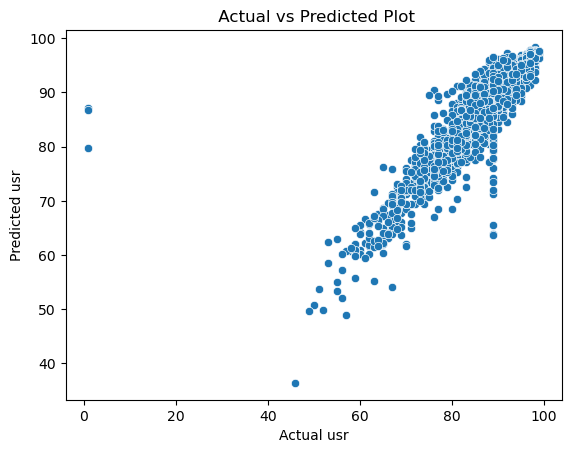

In [194]:
sns.scatterplot(y=olsres3.predict(X_test),x=y_test)
plt.title(" Actual vs Predicted Plot")
plt.xlabel("Actual usr")
plt.ylabel("Predicted usr")
plt.show()